# Table of Contents

1. **Business Understanding** 
   * [Business Understanding](#1-business-understanding)
2. **Data Understanding**
   * [Data Understanding](#2-data-understanding)
   * [Import and Inspect the Initial Data](#21-import-and-inspect-the-initial-data)
   * [Handling Missing Values](#22-handling-missing-values)
   * [Explore Data Characteristics](#23-explore-data-characteristics)
3. **Data Preprocessing**
   * [Data Preprocessing](#3-data-preprocessing)
   * [Data Transformation](#31-data-transformation)
   * [New Correlation Plot](#32-new-correlation-plot)
   * [Explore New Columns on Salary](#33-explore-new-columns-on-salary)
4. **Modelling**
   * [Modelling](#4-modelling)
   * [Feature Selection](#41-feature-selection)
   * [ML Models](#42-ml-models)
      * [Linear Regression](#421-linear-regression)
      * [Decision Tree](#422-decision-tree)
      * [Random Forest](#423-random-forest)
5. **Evaluation**
   * [Evaluation](#5-evaluation)


# Process Model
To ensure a structured approach CRISP-DM was used with the following steps:
- Business Understanding
- Data Understanding
- Data Preparation
- Modelling
- Evaluation
- Deployment

# 1. Business Understanding
In the project its wanted to predict salaries using different Machine Learning (Algorithms) learned during the course. \
In the constantly changing job market, determining the appropriate salary for data profession candidates is challenging. \
Salary levels are influenced by factors such as work experience, age, gender, and more. \
Machine learning techniques can analyze large datasets to identify patterns and predict salaries for new instances.

The problem statement is: \
**How can a Machine Learning algorithm be developed to predict the salary based of an employee’s specific attributes?**

Therefore our **y** in the project is going to be **SALARY**

Our dataset consists of 2639 entries representing data professionals and 12 features such as sex, past experience, job role, and work leaves. \
We will analyze feature correlation with salary, exclude low-correlation features, and preprocess the data to ensure relevance and avoid issues during model training.

# 2. Data Understanding
**Title**: Salary Prediction of Data Professions  
**Link**: [Kaggle Dataset](https://www.kaggle.com/datasets/krishujeniya/salary-prediction-of-data-professions)  

Dataset contains the following columns:
- **FIRST NAME**: First name of the data professional (String)  

- **LAST NAME**: Last name of the data professional (String)  

- **SEX**: Gender of the data professional (String: 'F' for Female, 'M' for Male)  

- **DOJ (Date of Joining)**: The date when the data professional joined the company (Date in MM/DD/YYYY format)  

- **CURRENT DATE**: The current date or the snapshot date of the data (Date in MM/DD/YYYY format)  

- **DESIGNATION**: The job role or designation of the data professional (String: e.g., Analyst, Senior Analyst, Manager)  

- **AGE**: Age of the data professional (Integer)  

- **SALARY**: Annual salary of the data professional (Float)  

- **UNIT**: Business unit or department the data professional works in (String: e.g., IT, Finance, Marketing)  

- **LEAVES USED**: Number of leaves used by the data professional (Integer)  

- **LEAVES REMAINING**: Number of leaves remaining for the data professional (Integer)  

- **RATINGS**: Performance ratings of the data professional (Float)  

- **PAST EXP**: Past work experience in years before joining the current company (Float) 

*Source: Kaggle Dataset Page*


In [0]:
#Import Libaries before starting
import numpy as np # Working with numbers.
import pandas as pd # Working with DateFrame etc.
import matplotlib.pyplot as plt # Create plots
import seaborn as sns # Create plots
import os # Working directory

# ? Get the current working directory to check working from the right folder.
# ? I had trouble loading the .csv file.
working_directory = os.getcwd()
print(working_directory)

c:\Users\chr55\Documents\PythonCourse\Course_Project


## 2.1 Import and Inspect the Initial Data
In this part the .csv is being read and some of the basic understanding of the data is being done.
- Head
- Tail
- Shape
- Describe
- Unique
- Info

In [0]:
df = pd.read_csv("salarydata.csv")  #Read "salarydata.csv"
# ! NOTICE Original data file i renamed to "salarydata.csv" in folder

In [0]:
df.head(5) # Print head of DataFrame (First 5 rows)
# 5 is also default with no number

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,5-18-2014,01-07-2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,ANNIE,NaN,F,NaN,01-07-2016,Associate,NaN,89207,Web,NaN,13.0,NaN,7
2,OLIVE,ANCY,F,7-28-2014,01-07-2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,CHERRY,AQUILAR,F,04-03-2013,01-07-2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
4,LEON,ABOULAHOUD,M,11-20-2014,01-07-2016,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3


In [0]:
df.tail() # Print tail of DataFrame (Last 5 rows)

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
2634,KATHERINE,ALSDON,F,6-28-2011,01-07-2016,Senior Manager,36.0,185977,Management,15.0,15.0,5.0,10
2635,LOUISE,ALTARAS,F,1-14-2014,01-07-2016,Analyst,23.0,45758,IT,17.0,13.0,2.0,0
2636,RENEE,ALVINO,F,1-23-2014,01-07-2016,Analyst,21.0,47315,Web,29.0,1.0,5.0,0
2637,TERI,ANASTASIO,F,3-17-2014,01-07-2016,Analyst,24.0,45172,Web,23.0,7.0,3.0,1
2638,GREGORY,ABARCA,M,9-18-2014,01-07-2016,Analyst,24.0,49176,Marketing,17.0,13.0,2.0,2


In [0]:
df.shape # Get shape of "df"

(2639, 13)

From `df.shape` its possible to get the size of the DataFrame "df". \
Dataset is 2639 rows. \
Dataset contains 13 variables (columns) which are stated below with: `df.info()`

In [0]:
df.info() # Get information about dataframe datatypes in "df"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2639 entries, 0 to 2638
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   FIRST NAME        2639 non-null   object 
 1   LAST NAME         2637 non-null   object 
 2   SEX               2639 non-null   object 
 3   DOJ               2638 non-null   object 
 4   CURRENT DATE      2639 non-null   object 
 5   DESIGNATION       2639 non-null   object 
 6   AGE               2636 non-null   float64
 7   SALARY            2639 non-null   int64  
 8   UNIT              2639 non-null   object 
 9   LEAVES USED       2636 non-null   float64
 10  LEAVES REMAINING  2637 non-null   float64
 11  RATINGS           2637 non-null   float64
 12  PAST EXP          2639 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 268.2+ KB


From df.info its possible to get:
- Column names
- Non-Null Count
- Dtypes like: object, int64, float64

In [0]:
df.nunique() # Get number of unique values in "df" columns

FIRST NAME          2367
LAST NAME           2475
SEX                    2
DOJ                  967
CURRENT DATE           1
DESIGNATION            6
AGE                   25
SALARY              2305
UNIT                   6
LEAVES USED           16
LEAVES REMAINING      16
RATINGS                4
PAST EXP              21
dtype: int64

The columns with the most unique columns are "FIRST NAME" and "LAST NAME" which is to be expected. \
SALARY is also a lot of unique values which is good. \
CURRENT DATE only contain the same date but can be used to calculate number of days from DOJ (Date of Joining)

In [0]:
df.describe() #Describe "df" from all numeric columns such as min, max and mean

,AGE,SALARY,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
count,2636.000000,2639.000000,2636.000000,2637.000000,2637.000000,2639.000000
mean,24.756449,58136.678287,22.501517,7.503223,3.486159,1.566881
std,3.908228,36876.956944,4.604469,4.603193,1.114933,2.728416
min,21.000000,40001.000000,15.000000,0.000000,2.000000,0.000000
25%,22.000000,43418.000000,19.000000,4.000000,2.000000,0.000000
50%,24.000000,46781.000000,22.000000,8.000000,3.000000,1.000000
75%,25.000000,51401.500000,26.000000,11.000000,4.000000,2.000000
max,45.000000,388112.000000,30.000000,15.000000,5.000000,23.000000


From describe its possible to see all the numeric columns such as min, max and mean. \
There are also count and standard deviation (std)

## 2.2 Handling Missing Values
Dataset can contain duplicates or errors that will have to be resolved or looked into. \
Thus in this part these are being investigated and appropriate actions are being done. 

While its possible to **REMOVE MISSING** data rows there are also other options. \
There are 4 common methods to replace missing data:
1. **CONSTANT**: Replace the missing value with some constant, specified by analyst.
2. **MEAN**: Replace the missing value with the field mean (for numeric variables) or the mode (for categorical variables)
3. **RANDOM**: Replace the missing values with a value generated at random from the observed distribution of the variable.
4. **IMPUTED**: Replace the missing values with imputed values based on the other characteristics of the record.

Just removing rows can risk deleting important rows in the data. \
Therefore the above options should also be considered.

*Source: Discovering Knowledge in Data by Daniel T. Larose and Chantal D. Larose*

#### 2.2.1 Checking and Removing NaN
Getting a sum of all missing values in each column in "df"

In [0]:
df.isnull().sum() # Get sum of NaN values in "df"

FIRST NAME          0
LAST NAME           2
SEX                 0
DOJ                 1
CURRENT DATE        0
DESIGNATION         0
AGE                 3
SALARY              0
UNIT                0
LEAVES USED         3
LEAVES REMAINING    2
RATINGS             2
PAST EXP            0
dtype: int64

There are some missing values in the dataset.

Below creating "nan_df" and print NaN df: \
True = Missing Value \
False = Not a missing Value

In [0]:
# Check for NaN values
nan_df = df.isna()
nan_df = nan_df[nan_df.any(axis=1)]
nan_df


,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
1,False,True,False,True,False,False,True,False,False,True,False,True,False
4,False,False,False,False,False,False,True,False,False,False,False,True,False
5,False,True,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,True,False,False,False,False,False,False
11,False,False,False,False,False,False,False,False,False,True,False,False,False
15,False,False,False,False,False,False,False,False,False,False,True,False,False
19,False,False,False,False,False,False,False,False,False,True,False,False,False
23,False,False,False,False,False,False,False,False,False,False,True,False,False


In [0]:
len(nan_df) # Get length of "nan_df"

8

Looking at all rows that contain some kind of NaN. \
There is in total 8 rows that have some kind of missing data. \
Since its only 8 rows out of thousands **these will be removed from "df"** below.

In [0]:
df = df.dropna() # Remove all rows with NaN and save it as df
df.reset_index(inplace=False) # Reset number index on left side
df.head() # Print head of df

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,5-18-2014,01-07-2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
2,OLIVE,ANCY,F,7-28-2014,01-07-2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,CHERRY,AQUILAR,F,04-03-2013,01-07-2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
6,ELLIOT,AGULAR,M,09-02-2013,01-07-2016,Analyst,22.0,40339,Marketing,19.0,11.0,5.0,0
8,KATHY,ALSOP,F,6-29-2014,01-07-2016,Senior Analyst,28.0,63478,Operations,20.0,10.0,3.0,1


### 2.2.2 Checking and Removing Duplicates
Its possible that there are multiple rows that are duplicated in the data. \
In order to look for these we will use the following code below to find all duplicated rows. \
For more information about `pandas.DataFrame.duplicated` look at: [pandas.pydata](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html)

In [0]:
dub_df = df[df.duplicated(keep=False)] # Making "dub_df" that contain all duplicates both first and last
dub_df

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
17,ROYCE,AGOSTO,M,06-07-2014,01-07-2016,Analyst,24.0,48651,Web,27.0,3.0,5.0,1
32,FOSTER,ALDERMAN,M,5-22-2014,01-07-2016,Senior Analyst,26.0,68295,Operations,28.0,2.0,5.0,3
36,HILLARY,ANTONIA,F,12-17-2014,01-07-2016,Analyst,23.0,45389,Management,27.0,3.0,2.0,1
38,ROSIE,AMILL,F,2-18-2013,01-07-2016,Analyst,24.0,49901,Web,24.0,6.0,4.0,0
47,GILDA,ARANCIBIA,F,5-22-2013,01-07-2016,Analyst,23.0,40264,Web,24.0,6.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2576,ROMEO,AINSLEY,M,11-20-2014,01-07-2016,Analyst,23.0,41052,IT,15.0,15.0,5.0,1
2591,ROYCE,AGOSTO,M,06-07-2014,01-07-2016,Analyst,24.0,48651,Web,27.0,3.0,5.0,1
2600,SHEREE,APPEL,F,9-24-2013,01-07-2016,Analyst,25.0,49559,Management,22.0,8.0,5.0,2
2624,JOSPEH,ALLIS,M,2-26-2014,01-07-2016,Analyst,22.0,45364,Web,20.0,10.0,2.0,0


In [0]:
print("Number of duplicated rows:", len(dub_df))
# This is with both first and last.
# So only want to remove half of the rows

Number of duplicated rows: 322


There is in total 322 duplicated rows within "df". (These contain both first and second) \
One of these record should be keept this can be done by using one of the following: \
`keep=first` \
`keep=last`

In [0]:
dub_df = df[df.duplicated(keep="first")] # Select first duplicated rows from "df"
print(df.duplicated().sum())

161


From the first duplicated rows we now want to delete the first duplicated rows from the DateFrame "df". \
This is done by using drop and using the index number of the rows.

In [0]:
df = df.drop(dub_df.index) # Remove the first duplicates from df using index from "dub_df"
df.head(10) # Print updated "df"

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,5-18-2014,01-07-2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
2,OLIVE,ANCY,F,7-28-2014,01-07-2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,CHERRY,AQUILAR,F,04-03-2013,01-07-2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
6,ELLIOT,AGULAR,M,09-02-2013,01-07-2016,Analyst,22.0,40339,Marketing,19.0,11.0,5.0,0
8,KATHY,ALSOP,F,6-29-2014,01-07-2016,Senior Analyst,28.0,63478,Operations,20.0,10.0,3.0,1
9,LILIAN,APELA,F,11-11-2014,01-07-2016,Analyst,22.0,43110,Finance,15.0,15.0,3.0,0
10,BELLE,ARDS,F,03-10-2014,01-07-2016,Analyst,24.0,41590,Marketing,22.0,8.0,4.0,1
12,WELDON,AIVAO,M,08-01-2013,01-07-2016,Analyst,24.0,44828,Finance,15.0,15.0,5.0,1
13,BOYD,AFTON,M,3-22-2013,01-07-2016,Analyst,21.0,45830,Web,23.0,7.0,2.0,0
14,BART,AGUILLERA,M,7-27-2013,01-07-2016,Analyst,24.0,43457,Management,30.0,0.0,4.0,1


It can now be seen that some of the first rows that were duplicated are removed above.
Below we are gonna reset index so it starts from 0 again.

In [0]:
df.reset_index(drop=True, inplace=True) # Reset the index to start from 0
df.head(10) # Checking by printing head

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,5-18-2014,01-07-2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,OLIVE,ANCY,F,7-28-2014,01-07-2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
2,CHERRY,AQUILAR,F,04-03-2013,01-07-2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
3,ELLIOT,AGULAR,M,09-02-2013,01-07-2016,Analyst,22.0,40339,Marketing,19.0,11.0,5.0,0
4,KATHY,ALSOP,F,6-29-2014,01-07-2016,Senior Analyst,28.0,63478,Operations,20.0,10.0,3.0,1
5,LILIAN,APELA,F,11-11-2014,01-07-2016,Analyst,22.0,43110,Finance,15.0,15.0,3.0,0
6,BELLE,ARDS,F,03-10-2014,01-07-2016,Analyst,24.0,41590,Marketing,22.0,8.0,4.0,1
7,WELDON,AIVAO,M,08-01-2013,01-07-2016,Analyst,24.0,44828,Finance,15.0,15.0,5.0,1
8,BOYD,AFTON,M,3-22-2013,01-07-2016,Analyst,21.0,45830,Web,23.0,7.0,2.0,0
9,BART,AGUILLERA,M,7-27-2013,01-07-2016,Analyst,24.0,43457,Management,30.0,0.0,4.0,1


## 2.3 Explore Data Characteristics
In this part columns are being checked to contain only the expected values or any errors in df. \
Those that will be checked is:
- SEX
- DOJ
- CURRENT DATE
- DESIGNATION
- AGE
- SALARY
- UNIT
- LEAVES USED
- LEAVES REMAINING
- RATINGS
- FAST EXPERIENCE

In addition other plots on these will also be done. \
"FIRST NAME" and "LAST NAME" will not be checked.

### 2.3.1 Initial Correlation Matrix

Used to control colors in plot: \
LINK: [Control Color in Seaborn Heatmaps](https://python-graph-gallery.com/92-control-color-in-seaborn-heatmaps/)

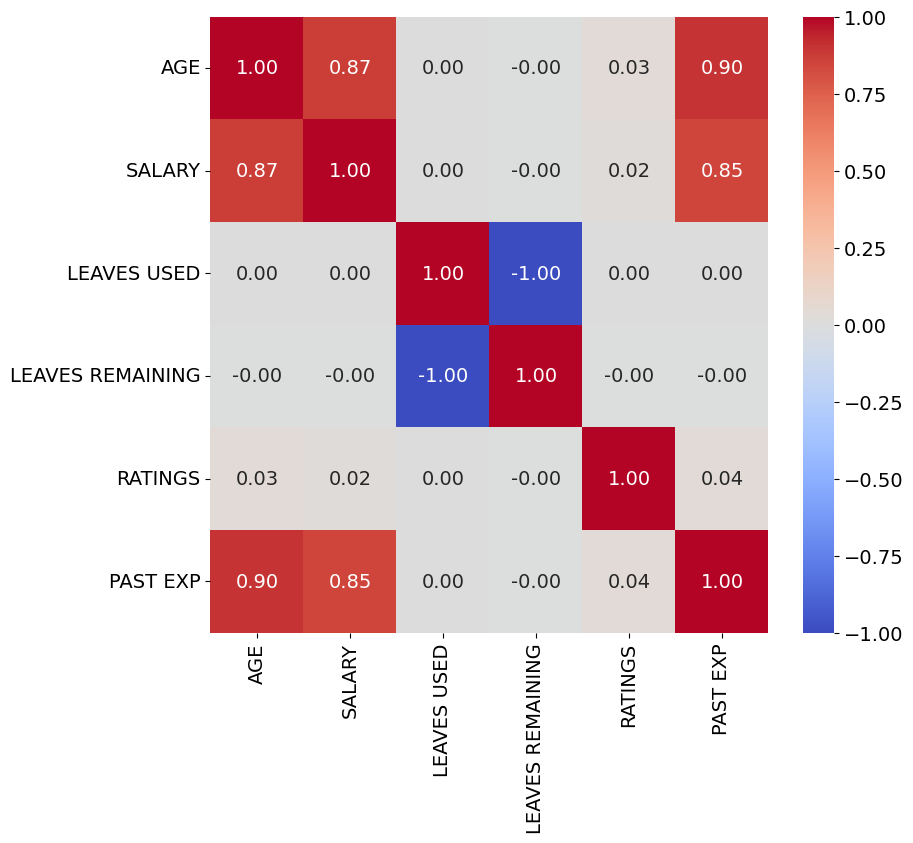

In [0]:
# Make selection of data types that are only "int64" and "float64" to only get numbers
num_df = df.select_dtypes(include=["int64", "float64"]).columns

corr_matrix = df[num_df].corr() # Calculate correlations between number columns

# Create a heatmap with correlations
plt.figure(figsize=(9,8))
sns.heatmap(corr_matrix,
            annot=True, # "True" all cells are annotated with numbers
            fmt=".2f", # "d" for integers and ".2f" for 2 decimals 
            cmap="coolwarm") # Colormap using color control
plt.show()

From the correlation plot the following can be seen on SALARY:
- Large correlation between `SALARY` and `AGE`.
- Large correlation between `SALARY` and `PAST EXP`.

There is also a large correlation on:
- Large correlation between `AGE` and `PAST EXP`.

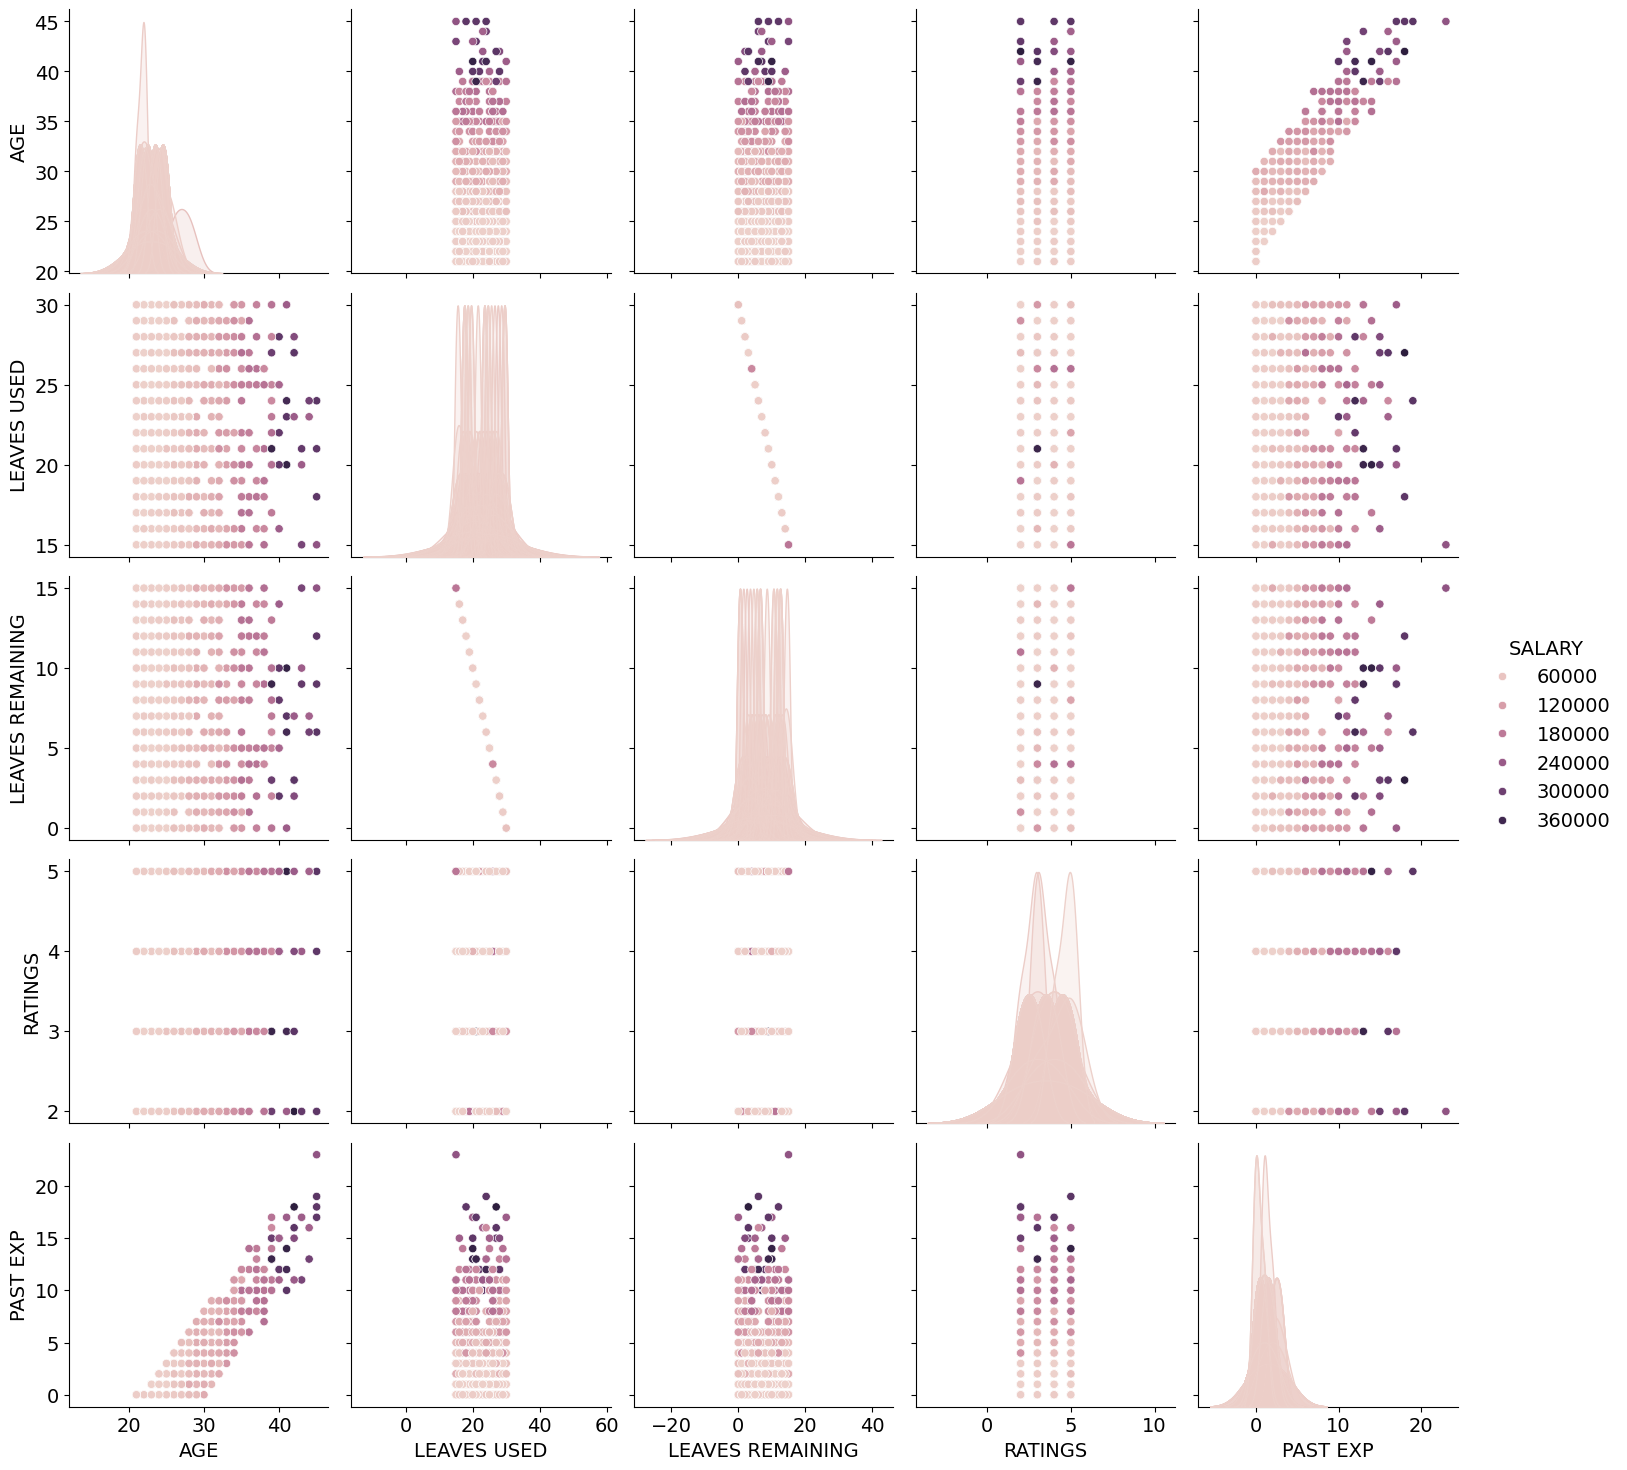

In [0]:
sns.pairplot(df, hue="SALARY", height=3) # Pairplot with color on Salary

Darker colors are higher salary while light colors are lower salaries

### 2.3.2 Explore SEX
In this part SEX column will be looked into.

In [0]:
print(df["SEX"].unique()) # Print unique values in column SEX

['F' 'M']


Column "SEX" only contains F and M which it also should in order to be correct. \
No corrections are nessecary. \
Below we will do a countplot to check distribution of SEX.

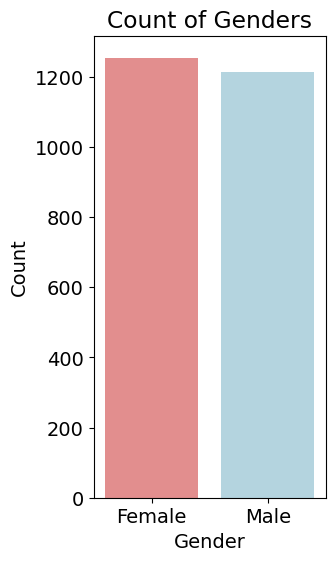

In [0]:
# Create a plot of "SEX"
plt.figure(figsize=(3,6))
sns.countplot(x="SEX", data=df,
              hue="SEX", # We can to color on SEX. Its also possible without but will result in Future Warning in Python.
              palette={"F": "lightcoral", # F and M gets a specific color
                       "M": "lightblue"})
# Set Labels on
plt.title("Count of Genders")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=["Female", "Male"]) # Changes M and F to Male and Female
plt.show()

From the plot above:
- Female and Male is almost the same.
- There is slightly more females in the dataset

This should not be a problem later on.

### 2.3.3 Explore UNIT
In this part UNIT column will be looked into.

In [0]:
print(df["UNIT"].unique()) # Print unique values in column UNIT

['Finance' 'IT' 'Marketing' 'Operations' 'Web' 'Management']


Column "UNIT" contains 6 different units these are:
- Finance
- IT
- Marketing
- Operations
- Web
- Management

There are no spelling errors in these. So there is nothing to correct with these.

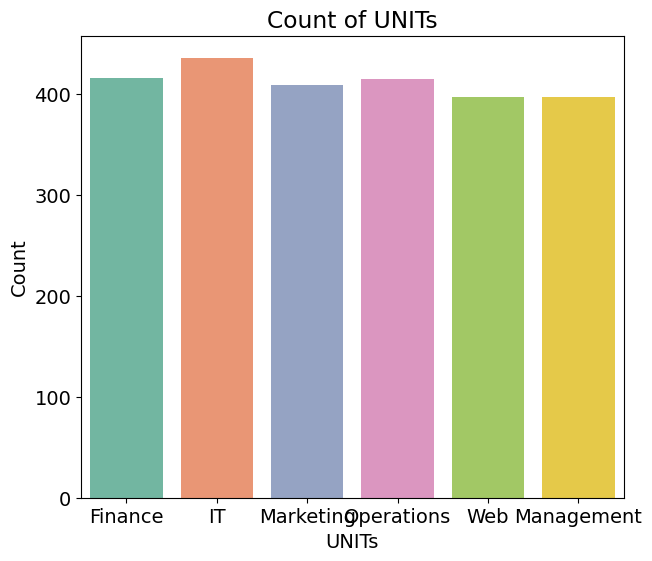

In [0]:
# Create a plot of "UNIT"
plt.figure(figsize=(7,6))
sns.countplot(x="UNIT", data=df,
              hue="UNIT",
              palette="Set2")
# Set Labels on
plt.title("Count of UNITs")
plt.xlabel("UNITs")
plt.ylabel("Count")
plt.show()

From the above plot:
- There is almost the same amount in all areas of business
- IT is the biggest

This is a fine distribution in the dataset.

### 2.3.4 Explore AGE
In this part the age column will be looked into.

In [0]:
print(df["AGE"].unique())

[21. 22. 28. 24. 25. 23. 26. 29. 39. 32. 31. 38. 27. 33. 35. 41. 42. 43.
 36. 34. 30. 45. 40. 37. 44.]


Column "AGE" does not contain any obvious data errors and the span of age is 21 to 45 years old. \
But we want to change it to integer. (It shows . in the print) \
This will make plots prettier.
This will be done below:

In [0]:
df["AGE"] = df["AGE"].astype(int) # Change Age to integer
print(df["AGE"].unique()) # New print to check

[21 22 28 24 25 23 26 29 39 32 31 38 27 33 35 41 42 43 36 34 30 45 40 37
 44]


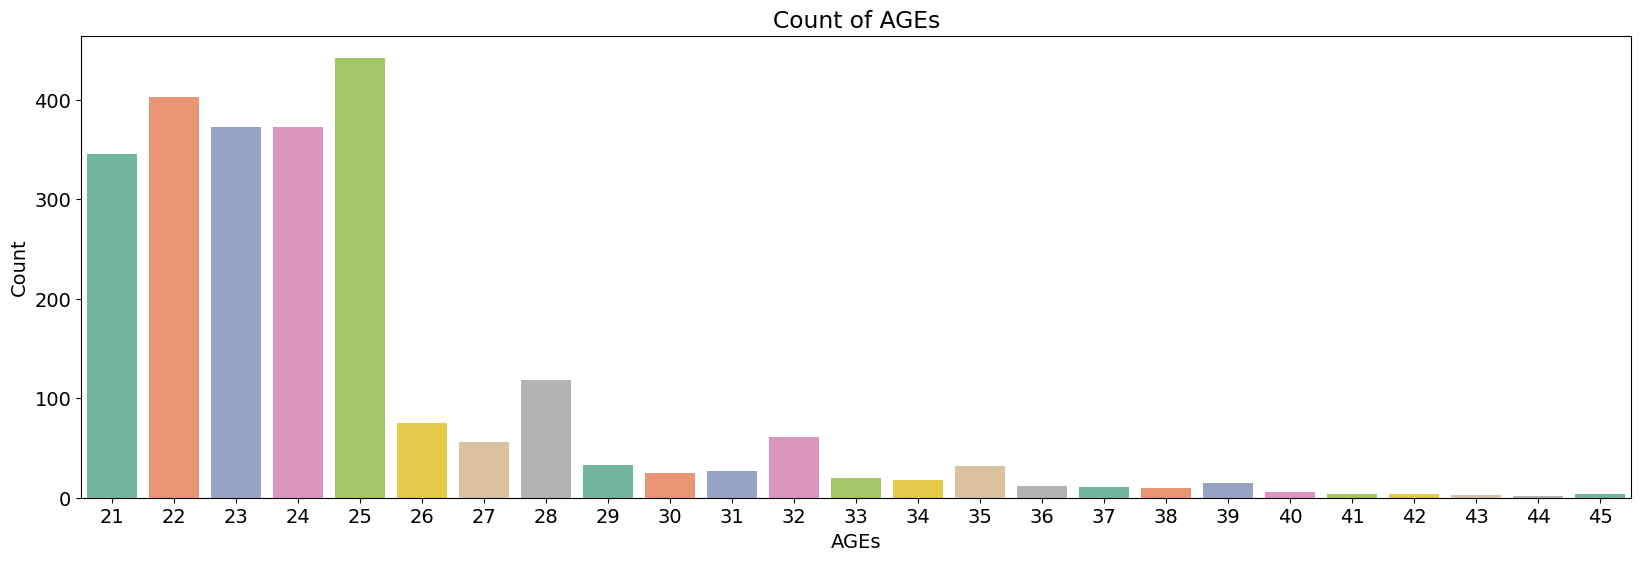

In [0]:
# Create a plot of "AGE"
plt.figure(figsize=(20,6))
sns.countplot(x="AGE", data=df,
              hue="AGE",
              legend=None,
              palette="Set2")
# Set Labels on
plt.title("Count of AGEs")
plt.xlabel("AGEs")
plt.ylabel("Count")
plt.show()

From the plot above:
- Dataset contains a lot of 21-25 year olds.
- +40 there is not that much data.
- 26 - 39 are also quite small

This should probably be mentioned later on. \
This can give problems later.

### 2.3.5 Explore SALARY
In this part SALARY together with others will be explored.

<Axes: title={'center': 'SALARY'}, xlabel='SEX'>

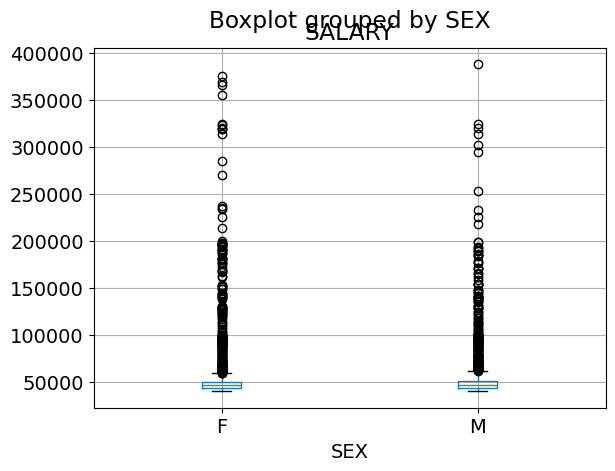

In [0]:
df.boxplot(column="SALARY", by="SEX")

Salary and Sex there is many outliers. \
Could be due to the AGEs that we looked into before.
These could probably also be due to different positions suchs as Directors and Senior Managers. \
Which can be seen below:

<Axes: title={'center': 'SALARY'}, xlabel='DESIGNATION'>

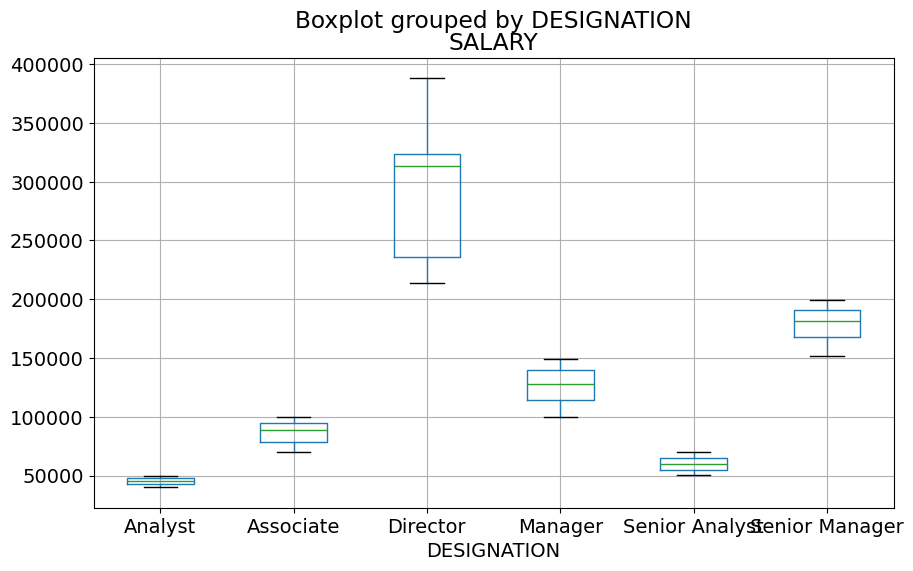

In [0]:
df.boxplot(column="SALARY", by="DESIGNATION", figsize=(10,6))   

Designation (Position) there are not outliers in each Designation. \
Directors have the biggest boxplot

Salary in the different DESIGNATIONS from low to high:
- Analyst
- Senior Analyst
- Associate
- Manager
- Senior Manager
- Director

This should possibly be considered later on when doing pre-processing.

### 2.3.6 Explore Past Exp with Salary
In this part PAST EXP and SALARY will be looked into.

Text(0.5, 1.0, 'Past Experience vs Salary')

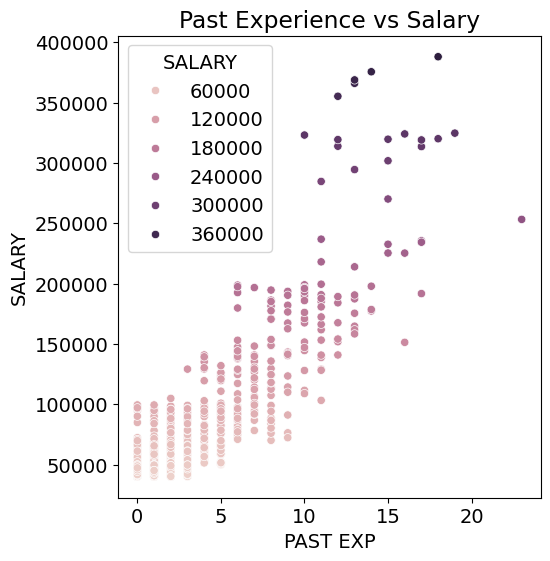

In [0]:
#specific scatterplot for selected features
plt.figure(figsize=(12,6))

#Past Exp vs Salary
plt.subplot(1,2,1)
sns.scatterplot(x="PAST EXP", y="SALARY", hue="SALARY", data=df)
plt.title('Past Experience vs Salary')

<Axes: title={'center': 'SALARY'}, xlabel='PAST EXP'>

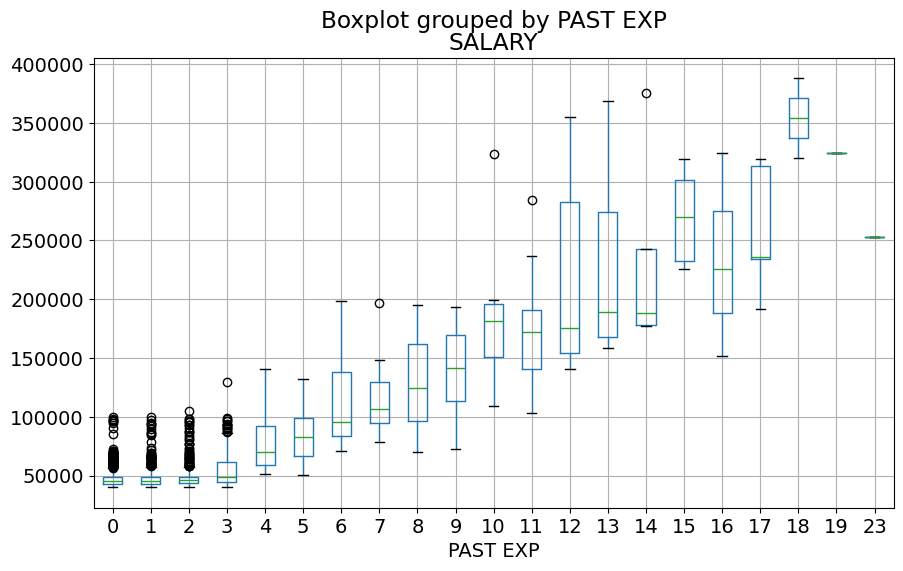

In [0]:
df.boxplot(column="SALARY", by="PAST EXP", figsize=(10,6)) 

More experience does give a higher salary. \
But there is not as much data in the higher experience and high salary.

### 2.3.7 Explore Ratings vs Salary
In this part RATINGS and SALARY will be looked into.

Text(0.5, 1.0, 'Ratings vs Salaries')

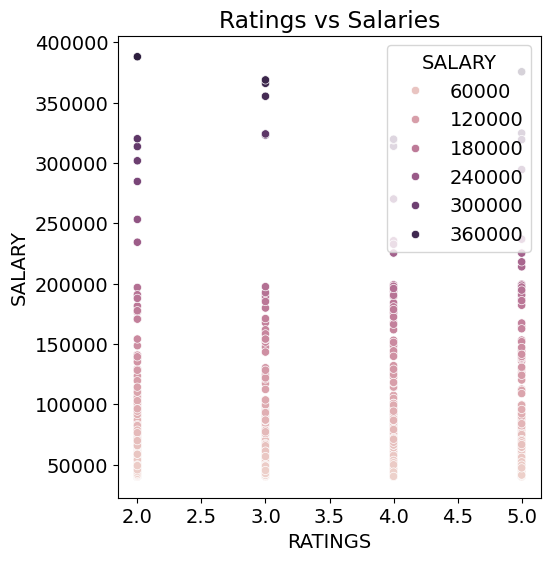

In [0]:
#specific scatterplot for selected features
plt.figure(figsize=(12,6))

#Past Exp vs Salary
plt.subplot(1,2,1)
sns.scatterplot(x="RATINGS", y="SALARY", hue="SALARY", data=df)
plt.title('Ratings vs Salaries')

Which was also seen in the first correlation plot there is no change in SALARY on RATINGS. \
RATINGS contain all levels of salary. \
Thus small or high ratings is no indication of higer or lower salary.


### 2.3.8 Explore Leaves Used / Leaves Left vs Salary
Same as above SALARY and LEAVES will be looked into.

Text(0.5, 1.0, 'Leaves Used vs Salary')

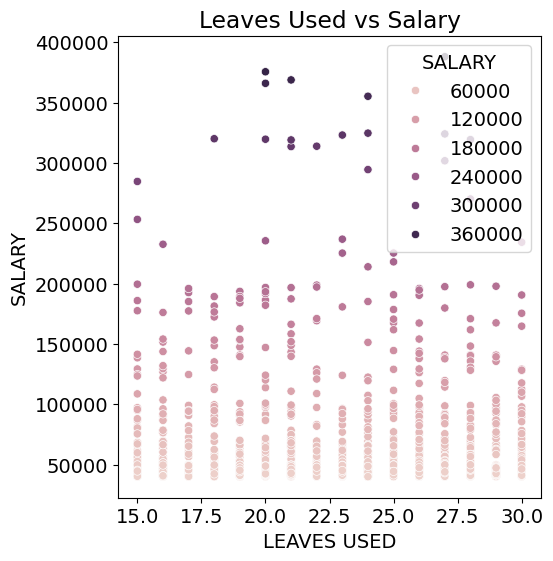

In [0]:
#specific scatterplot for selected features
plt.figure(figsize=(12,6))

#Past Exp vs Salary
plt.subplot(1,2,1)
sns.scatterplot(x="LEAVES USED", y="SALARY", hue="SALARY", data=df)
plt.title('Leaves Used vs Salary')

Leaves used / Leaves left contain both larger and smaller salaries for all. \
Thus the amount of leaves does not change salaries.

### 2.3.9 Explore PAST EXP

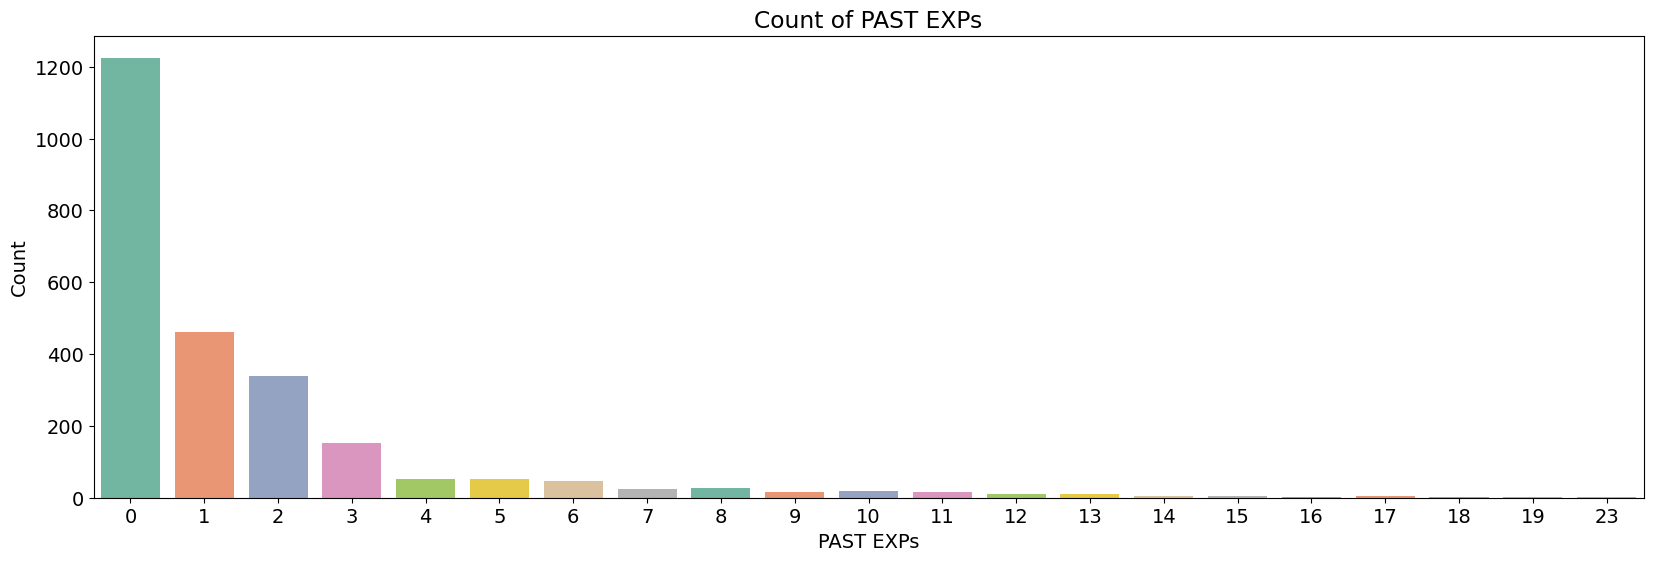

In [0]:
# Create a plot of "AGE"
plt.figure(figsize=(20,6))
sns.countplot(x="PAST EXP", data=df,
              hue="PAST EXP",
              legend=None,
              palette="Set2")
# Set Labels on
plt.title("Count of PAST EXPs")
plt.xlabel("PAST EXPs")
plt.ylabel("Count")
plt.show()

### 2.3.10 Explore DESIGNATION

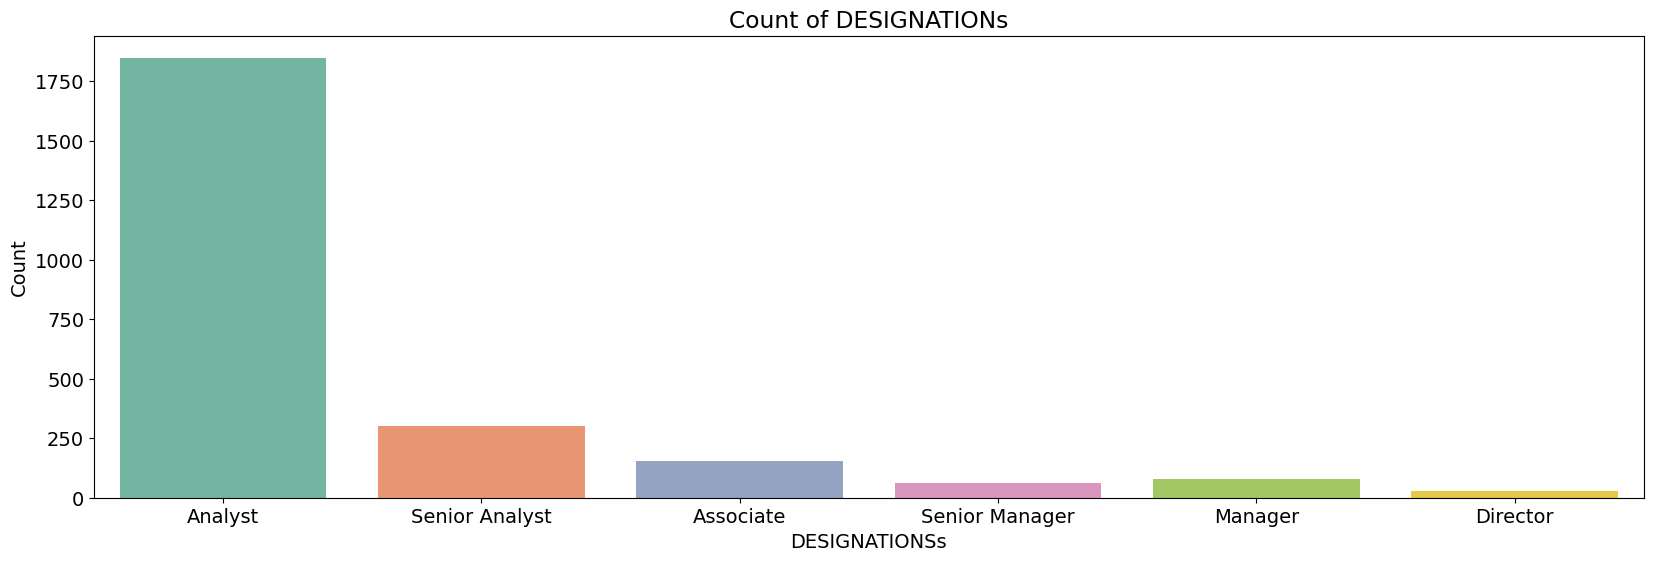

In [0]:
# Create a plot of "AGE"
plt.figure(figsize=(20,6))
sns.countplot(x="DESIGNATION", data=df,
              hue="DESIGNATION",
              legend=None,
              palette="Set2")
# Set Labels on
plt.title("Count of DESIGNATIONs")
plt.xlabel("DESIGNATIONSs")
plt.ylabel("Count")
plt.show()

There is alot more Analyst and Senior Analyst in the dataset compared to the other units.

### 2.3.11 Explore LEAVES

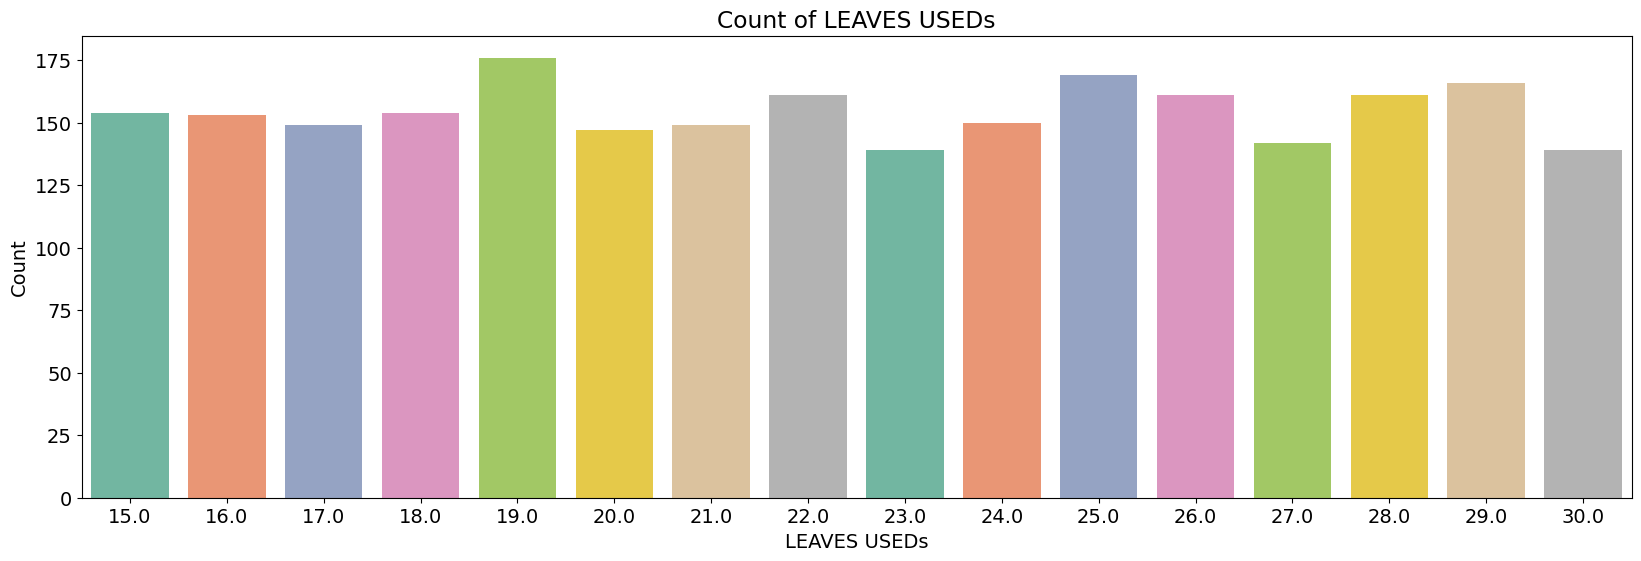

In [0]:
# Create a plot of "AGE"
plt.figure(figsize=(20,6))
sns.countplot(x="LEAVES USED", data=df,
              hue="LEAVES USED",
              legend=None,
              palette="Set2")
# Set Labels on
plt.title("Count of LEAVES USEDs")
plt.xlabel("LEAVES USEDs")
plt.ylabel("Count")
plt.show()

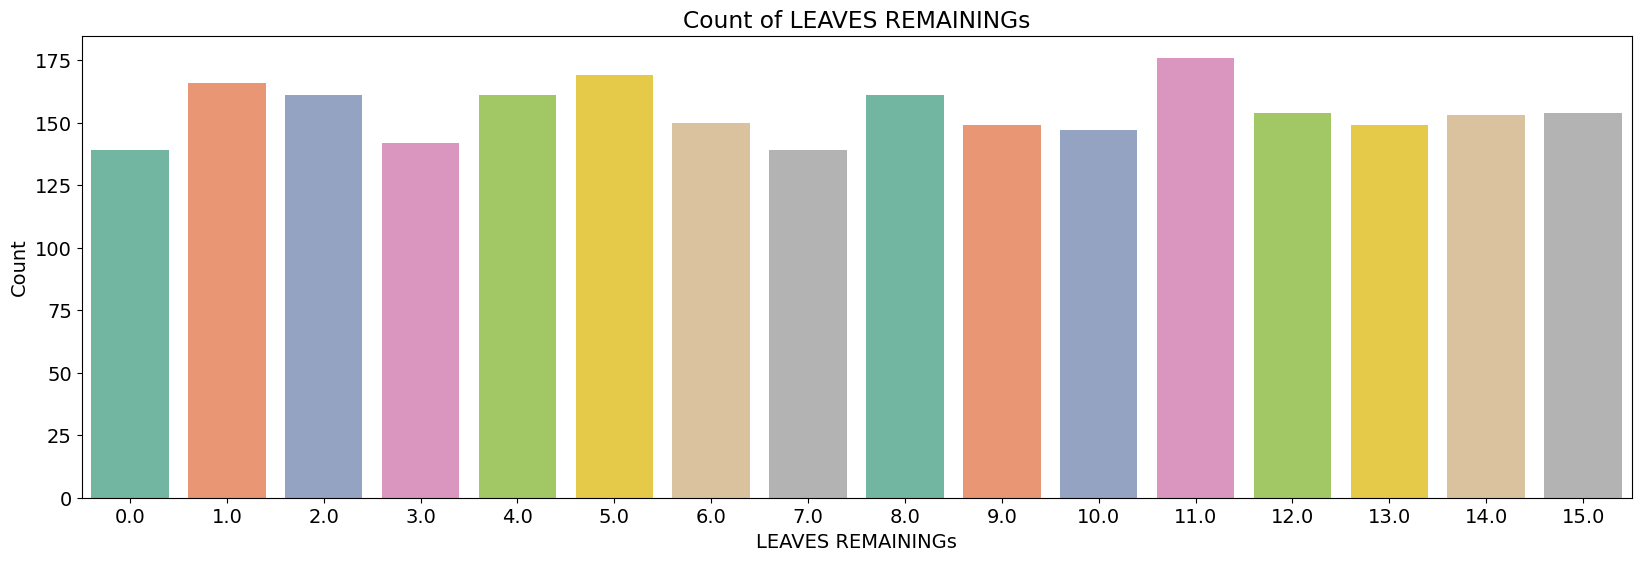

In [0]:
# Create a plot of "AGE"
plt.figure(figsize=(20,6))
sns.countplot(x="LEAVES REMAINING", data=df,
              hue="LEAVES REMAINING",
              legend=None,
              palette="Set2")
# Set Labels on
plt.title("Count of LEAVES REMAININGs")
plt.xlabel("LEAVES REMAININGs")
plt.ylabel("Count")
plt.show()

### 2.3.12 Explore Salary

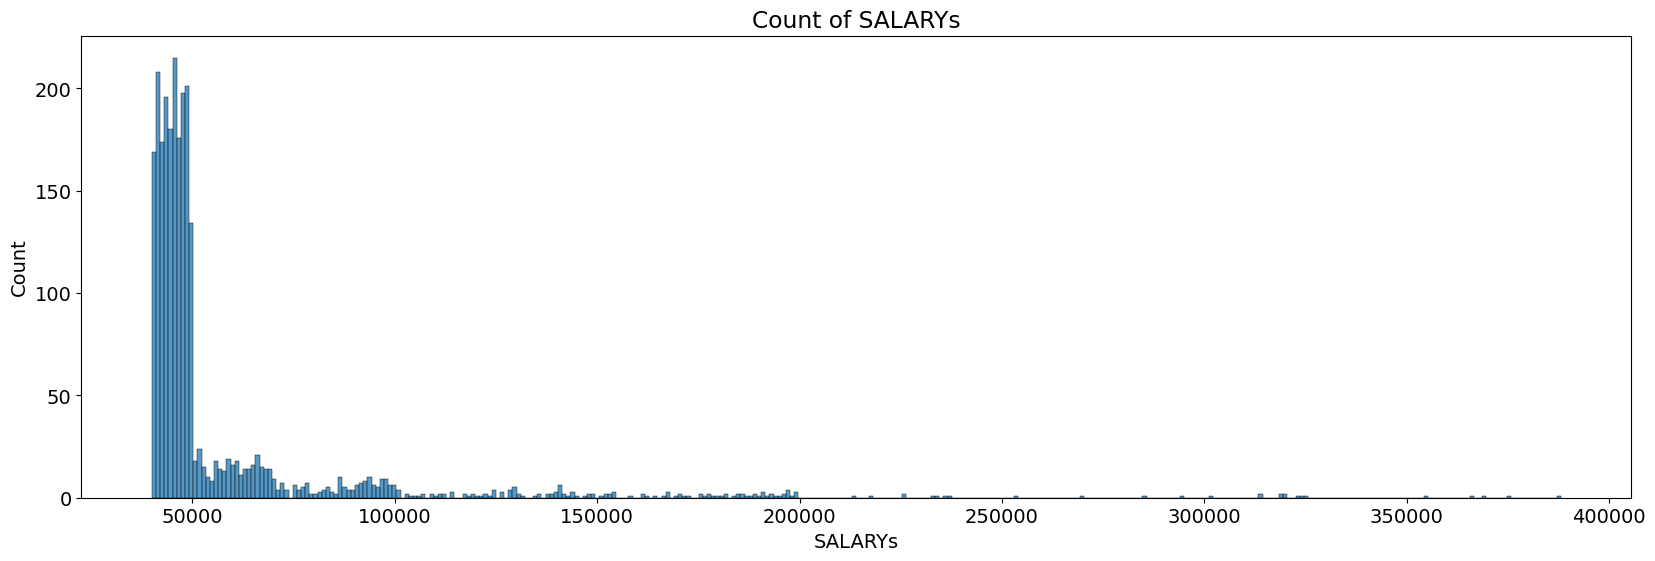

In [0]:
# Create a plot of "AGE"
plt.figure(figsize=(20,6))
sns.histplot(x="SALARY", data=df, legend=None) # ! changed to histplot for histogram
# Set Labels on
plt.title("Count of SALARYs")
plt.xlabel("SALARYs")
plt.ylabel("Count")
plt.show()

# 3. Data Preprocessing
All possible columns with numbers have been explored. \
But some columns could use encoders or transformations to make more visualizations. \
In this chapter this will be done an new possible columns will be explored further.

## 3.1 Data Transformation
It is decided to combine the two columns of "CURRENT DATE" & "DOJ" into one column with numerical data. \
This is done by creating the new column "DAYS IN COMPANY" that equals substracting "DOJ" from "CURRENT DATE". \
These values will be easier to work with using ML-algorithms and make some visualizations such as correlation matrix on more.

### 3.1.1 DOJ and CURRENT DATE Transformation
Using datetime to work with dates a new column of days in company will we created.

In [0]:
from datetime import datetime # Import datetime to make calculations with dates

df['DOJ'] = pd.to_datetime(df['DOJ'])
df['CURRENT DATE'] = pd.to_datetime(df['CURRENT DATE'])

df['DAYS IN COMPANY'] = (df['CURRENT DATE'] - df['DOJ']).dt.days # CURRENT DATE substracted with DOJ equals DAYS IN COMPANY

df.drop(columns=['DOJ', 'CURRENT DATE'], inplace=True) # Drop old date columns

Below, the updated DataFrame is displayed, showing the new column "DAYS IN COMPANY"

In [0]:
# Print the updated DataFrame
df.head(3)

,FIRST NAME,LAST NAME,SEX,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,DAYS IN COMPANY
0,TOMASA,ARMEN,F,Analyst,21,44570,Finance,24.0,6.0,2.0,0,599
1,OLIVE,ANCY,F,Analyst,21,40955,Finance,23.0,7.0,3.0,0,528
2,CHERRY,AQUILAR,F,Analyst,22,45550,IT,22.0,8.0,3.0,0,1009


### 3.1.2 SEX Transformation
Currently SEX contain M and F its wanted to transform these to numeric.
- F = 0
- M = 0

Here LabelEncoder will be used:

In [0]:
from sklearn.preprocessing import LabelEncoder

# Create the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'SEX' column
df['SEX'] = label_encoder.fit_transform(df['SEX'])

### 3.1.3 DESIGNATION Transformation
Designation is currently object we can to transform it using ordinal encoder. \
In one of the previous plots there was found a order in Salaries. \
Salary in the different DESIGNATIONS from low to high:
- Analyst
- Senior Analyst
- Associate
- Manager
- Senior Manager
- Director

This was found in boxplot at section: [Explore Salary](#235-explore-salary)


In [0]:
from sklearn.preprocessing import OrdinalEncoder

# Create the OrdinalEncoder with the specified order
ordinal_encoder = OrdinalEncoder(categories=[['Analyst', 'Senior Analyst', 'Associate', 'Manager', 'Senior Manager', 'Director']])

# Fit and transform the 'DESIGNATION' column
df['DESIGNATION'] = ordinal_encoder.fit_transform(df[['DESIGNATION']])

### 3.1.4 UNIT Transformation
UNIT is currently and object its wanted to transform this into numeric. \
Here one_hot_encoded will be used. 

For each UNIT a new column with TRUE / FALSE will be created depending on what UNIT is in the row. \
This will result in the following new columns:
- UNIT_Finance
- UNIT_IT
- UNIT_Management
- UNIT_Marketing
- UNIT_Operations
- UNIT_Web



In [0]:
# Apply One-Hot Encoding on the 'UNIT' column
one_hot_encoded = pd.get_dummies(df['UNIT'], prefix='UNIT')

# Apply a mapping to convert True/False to 1/0
one_hot_encoded = one_hot_encoded.map(lambda x: 1 if x else 0)

# Link the one-hot encoded columns to the DataFrame
df = pd.concat([df, one_hot_encoded], axis=1)

# Remove the original 'UNIT' column
df.drop('UNIT', axis=1, inplace=True)

In [0]:
df.head(1) # Show new columns

,FIRST NAME,LAST NAME,SEX,DESIGNATION,AGE,SALARY,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,DAYS IN COMPANY,UNIT_Finance,UNIT_IT,UNIT_Management,UNIT_Marketing,UNIT_Operations,UNIT_Web
0,TOMASA,ARMEN,0,0.0,21,44570,24.0,6.0,2.0,0,599,1,0,0,0,0,0


## 3.2 New Correlation Plot
After new numeric columns have been transformed / created its possible to make a new correlation plot.

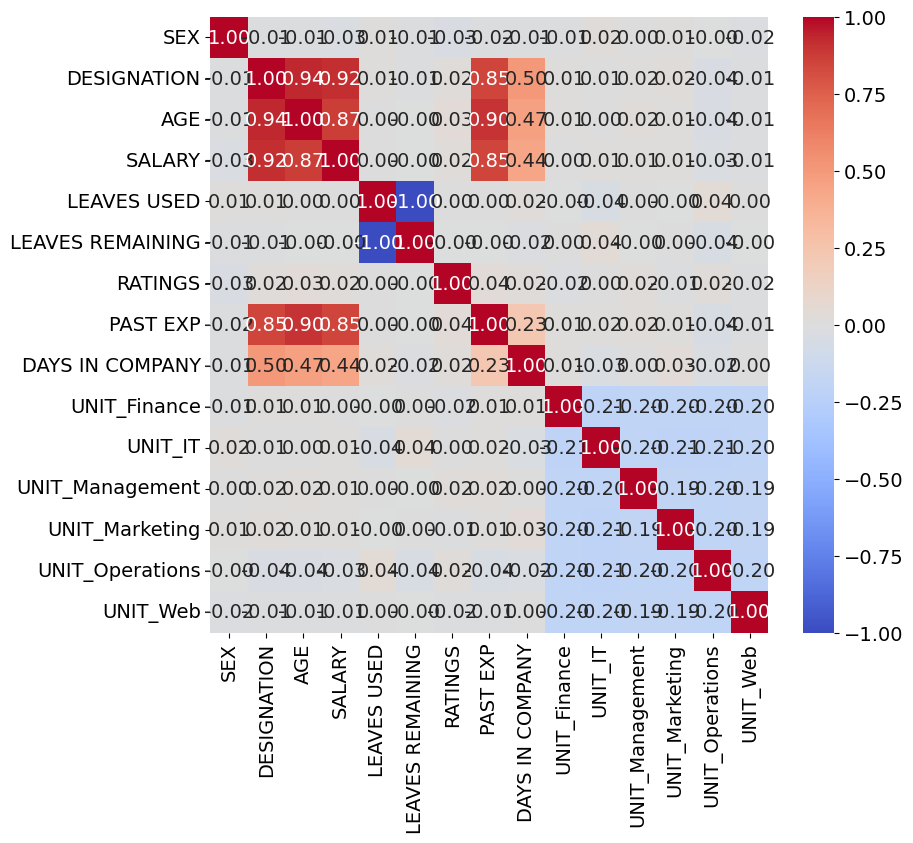

In [0]:
# Make selection of data types that are only "int64", "float64" and "int32" to only get numbers
num_df = df.select_dtypes(include=["int64", "float64", "int32"]).columns # ! int32 is added here since last time due to change of datatype on AGE = int32

corr_matrix = df[num_df].corr() # Calculate correlations between number columns

# Create a heatmap with correlations
plt.figure(figsize=(9,8))
sns.heatmap(corr_matrix,
            annot=True, # "True" all cells are annotated with numbers
            fmt=".2f", # "d" for integers and ".2f" for 2 decimals 
            cmap="coolwarm") # Colormap
plt.show()

In the new plot its possible to see that DESIGNATION and DAYS IN COMPANY also has a correlation on SALARY. \
UNITs does not have a correlation on SALARY.

## 3.3 Explore New Columns on SALARY
Its possible to easily make some plots on the new columns or the tranformed ones which will be done below.

<Figure size 640x480 with 0 Axes>

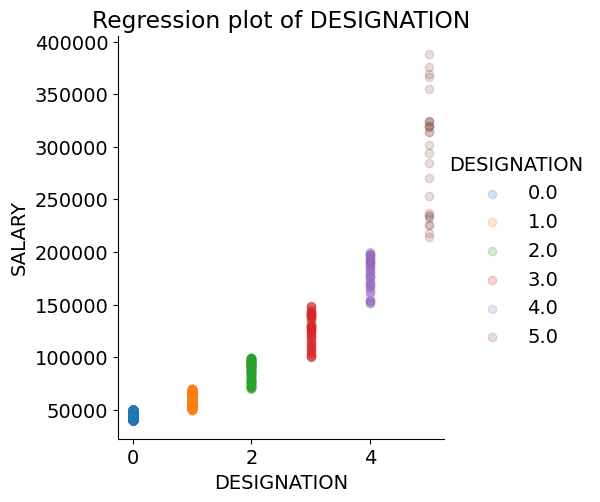

<Figure size 640x480 with 0 Axes>

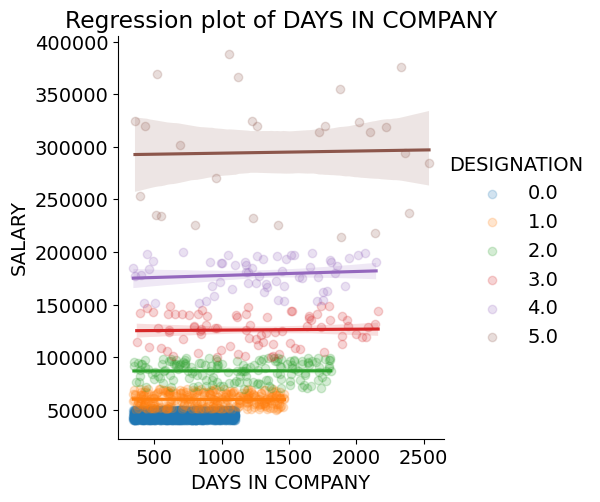

In [0]:
# Variables to explore
variables = ['DESIGNATION', 'DAYS IN COMPANY']

# Create regression plots
for var in variables:
    plt.figure()
    sns.lmplot(x=var, y='SALARY',  data=df,
                hue="DESIGNATION",
                scatter_kws={'alpha': 0.2}).set(title=f'Regression plot of {var}')
   
    plt.show()

These plot show some good groupings of SALARY and DESIGNATON. \
The last plot also shows that different DESIGNATION and DAYs in company. \
Associates has the least amount of time in a company and are paid the smalles amount. \
The higher DESIGNATION can also be more days in company. \
But not for all.

In [0]:
df.to_csv('df_processed.csv', index=False) # Saving current processed data.

# 4. Modelling
In this part feature selection will be done. \
In addition a few ML models will be used:
- Linear Regression
- Decision Tree
- Random Forest

In [0]:
df = pd.read_csv('df_processed.csv') # Read processed data

## 4.1 Feature Selection
From the plot done thorughout its now time to select what features should be selected for further use.

**Keeping** the following columns:
- DESIGNATION
- AGE
- SALARY (y)
- PAST EXP
- DAYS IN COMPANY

**Dropping** the following column due to low correlation or strings:
- LEAVES USED
- LEAVES REMAINING
- RATINGS
- FULL NAME
- LAST NAME
- UNITs
- SEX

Dropping all columns that does not have a correlation with SALARY and keeping those that have. \
In addition selected features will also be rearranged from most important to least important.

In [0]:
# Drop columns that are not 'DESIGNATION', 'AGE', 'PAST EXP', 'DAYS IN COMPANY'
df.drop(columns=['SEX', 'UNIT_Finance', "UNIT_IT", "UNIT_Management", "UNIT_Marketing", "UNIT_Marketing", "UNIT_Web", 'LEAVES USED', 'LEAVES REMAINING', 'RATINGS'], inplace=True)

# Rearrange the df columns from most important to least important
df = df[['DESIGNATION', 'AGE', 'PAST EXP', 'DAYS IN COMPANY', "SALARY"]]

In [0]:
# Print the selected features
df.head(5)

,DESIGNATION,AGE,PAST EXP,DAYS IN COMPANY,SALARY
0,0.0,21,0,599,44570
1,0.0,21,0,528,40955
2,0.0,22,0,1009,45550
3,0.0,22,0,857,40339
4,1.0,28,1,557,63478


### 4.1.1 Final Correlation Plot
After the feature selection its possible to see the final correlation plot.

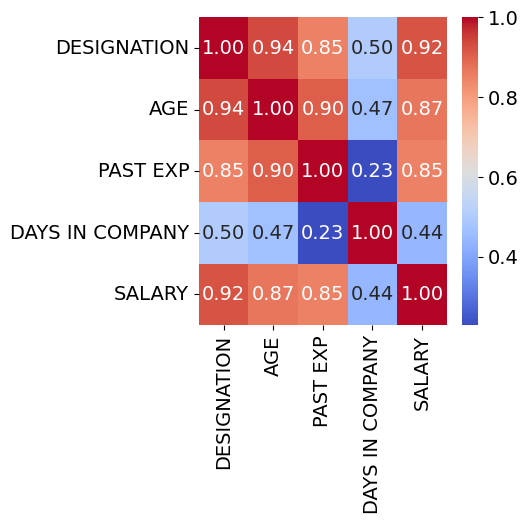

In [0]:
# Make selection of data types that are only "int64" and "float64" to only get numbers
num_df = df.select_dtypes(include=["int64", "float64","Int32"]).columns

corr_matrix = df[num_df].corr() # Calculate correlations between number columns

# Create a heatmap with correlations
plt.figure(figsize=(4,4))
sns.heatmap(corr_matrix,
            annot=True, # "True" all cells are annotated with numbers
            fmt=".2f", # "d" for integers and ".2f" for 2 decimals 
            cmap="coolwarm") # Colormap
plt.show()

### 4.1.2 Scatter Plot of Selected Features

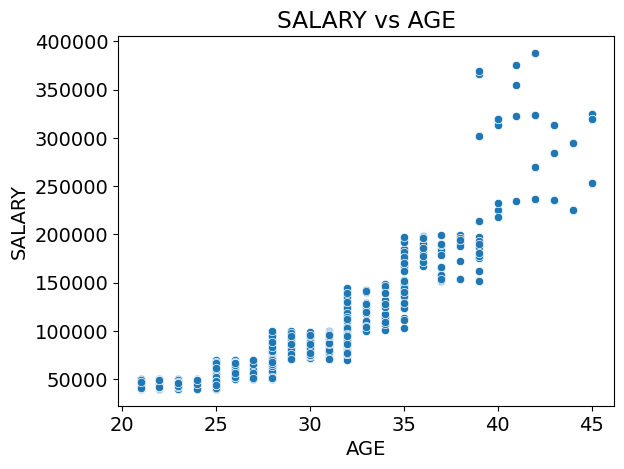

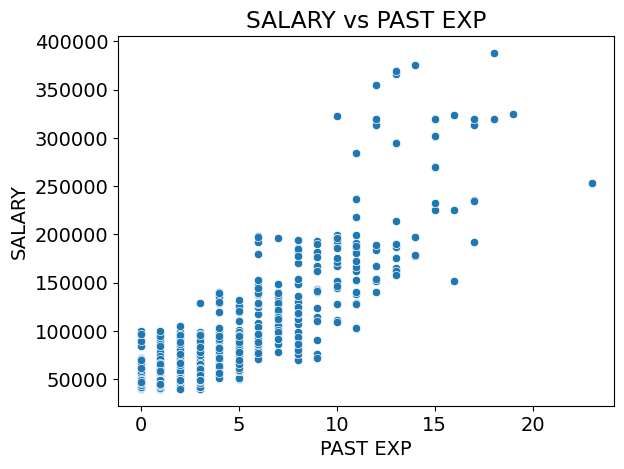

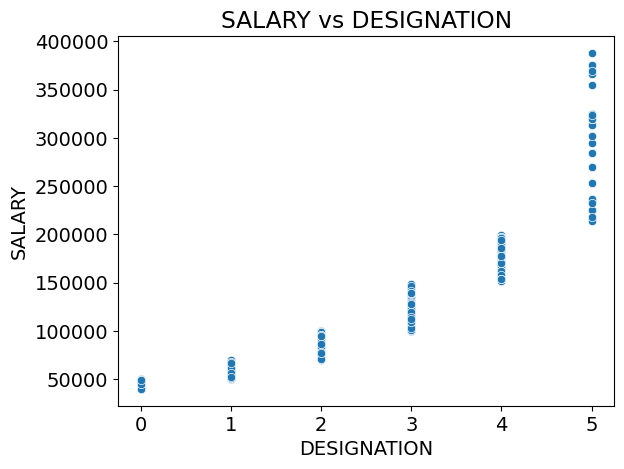

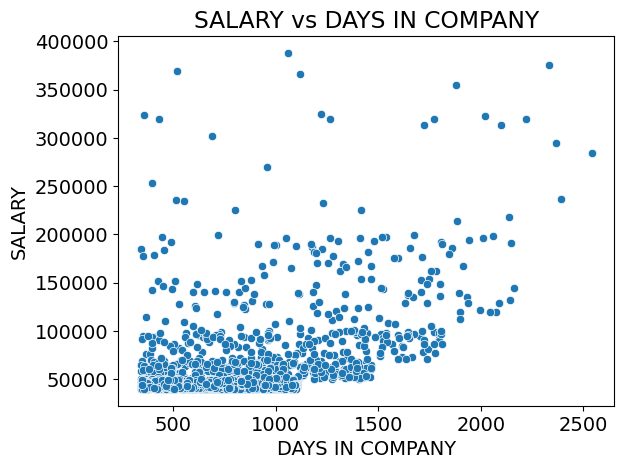

In [0]:
# Assuming df is your DataFrame  
numeric_cols = ['AGE', 'SALARY', 'PAST EXP', "DESIGNATION", "DAYS IN COMPANY"]  
  
# Scatter plots comparing 'SALARY' with other numeric columns  
for col in numeric_cols:  
    if col != 'SALARY':  
        sns.scatterplot(data=df, x=col, y="SALARY")  
        plt.title(f'SALARY vs {col}')  
        plt.show() 

In [0]:
df.to_csv('df_features.csv', index=False) 

## 4.2 ML Models
In this part the three different models will be created.

In [0]:
# for machine learning
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn import preprocessing
plt.rc("font", size=14)

### 4.2.1 Linear Regression
In this part the linear regression model will be created.

In [0]:
df = pd.read_csv('df_features.csv') #Loading data
df.head()

,DESIGNATION,AGE,PAST EXP,DAYS IN COMPANY,SALARY
0,0.0,21,0,599,44570
1,0.0,21,0,528,40955
2,0.0,22,0,1009,45550
3,0.0,22,0,857,40339
4,1.0,28,1,557,63478


Define y and X

In [0]:
# define y and x values for ML algo
y = df["SALARY"]
X = df[["DESIGNATION", "AGE", "PAST EXP", "DAYS IN COMPANY"]]

Split data in training and test datasets with test size of 20%

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=69)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=69)

Train the model using LinearRegression

In [0]:
regressor = LinearRegression()
regressor.fit(X_train, y_train) # training the ML algo with the training data

LinearRegression()

In [0]:
print("the intercept value is: ", regressor.intercept_)
print("the coefficient values are: ", regressor.coef_)

the intercept value is:  94934.23765486301
the coefficient values are:  [ 2.80176187e+04 -2.71410296e+03  5.88471104e+03  9.11299007e+00]


In [0]:
def cal(slope, intercept, hours):
  return slope * hours + intercept
  # y = mx + c (y=ax+b)

score = cal(regressor.coef_, regressor.intercept_, 50000)
print(score)

[ 1.40097587e+09 -1.35610214e+08  2.94330486e+08  5.50583741e+05]


In [0]:
y_pred = regressor.predict(X_test) # test data without the y variable

In [0]:
df_preds = pd.DataFrame({"Actual": y_test.squeeze(), "Predicted": y_pred.squeeze()})
print(df_preds)

      Actual      Predicted
2224   58745   66107.917568
1293   44576   45328.853646
685    49530   39236.824382
1514   40818   44909.512946
1971   42760   46987.274682
...      ...            ...
1773   41950   42952.643784
98     76964  103812.075400
18     48662   42376.101707
1639   41714   41184.723710
308    52083   66717.632283

[494 rows x 2 columns]


In [0]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

#Percentage Calc.
mean_actual = np.mean(y_test)
absolute_error_percentage = (mae / mean_actual) * 100

print(f"Mean absolute error:  {mae:.2f}") # on average the models predictions are off by this from the actual values
print(f"Mean squared error:  {mse:.2f}")
print(f"Root mean squared error:  {rmse:.2f}")
print(f"mean absolute error (%): {absolute_error_percentage:.2f}%")

Mean absolute error:  6496.78
Mean squared error:  127097082.29
Root mean squared error:  11273.73
mean absolute error (%): 11.39%


In [0]:
# check the training data to see if there is overfitting (if overfitting, the training data should be way more accurate than the test data

#predicting the training set
y_train_pred = regressor.predict(X_train)

# calculating the training set error
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(mse)

#Percentage calc.
mean_actual = np.mean(y_test)
train_absolute_error_percentage = (train_mae / mean_actual) * 100

print(f"Mean absolute error:  {train_mae:.2f}")
print(f"Mean squared error:  {train_mse:.2f}")
print(f"Root mean squared error:  {train_rmse:.2f}")
print(f"mean absolute error (%) (test_size=0,2): {train_absolute_error_percentage:.2f}%")

Mean absolute error:  6884.52
Mean squared error:  188843025.73
Root mean squared error:  11273.73
mean absolute error (%) (test_size=0,2): 12.07%


In [0]:
# doing a K-fold cross validation

#importing K-fold
from sklearn.model_selection import KFold

# calling the k-fild (using 10 splits. 5 splits gives approx the same error)
kf = KFold(n_splits=10, shuffle=True, random_state=69)

# creating list to store error methods
fold_mae_scores = []
fold_mse_scores = []
fold_rmse_scores = []
fold_mape_scores = []

# iterating over the folds
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # train model
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)

    # predict
    y_pred = regressor.predict(X_test)

    # calculating error folds
    fold_mae = mean_absolute_error(y_test, y_pred)
    fold_mse = mean_squared_error(y_test, y_pred)
    fold_rmse = np.sqrt(mse)

    # Calculate MAPE (avoiding division by zero)
    mape = np.mean(np.abs((y_test - y_pred) / np.where(y_test != 0, y_test, 1))) * 100

    #Percentage calc.
    mean_actual = np.mean(y_test)
    fold_absolute_error_percentage = (fold_mae / mean_actual) * 100



    # store each fold in the lists
    fold_mae_scores.append(mae)
    fold_mse_scores.append(mse)
    fold_rmse_scores.append(rmse)
    fold_mape_scores.append(mape)

# printing average scores across folds
print("Average MAE:", np.mean(fold_mae_scores))
print("Average MSE:", np.mean(fold_mse_scores))
print("Average RMSE:", np.mean(fold_rmse_scores))
print("Average MAPE:", np.mean(fold_mape_scores), "%")

Average MAE: 6496.777540741676
Average MSE: 127097082.2851787
Average RMSE: 11273.734176623942
Average MAPE: 10.271108875407744 %


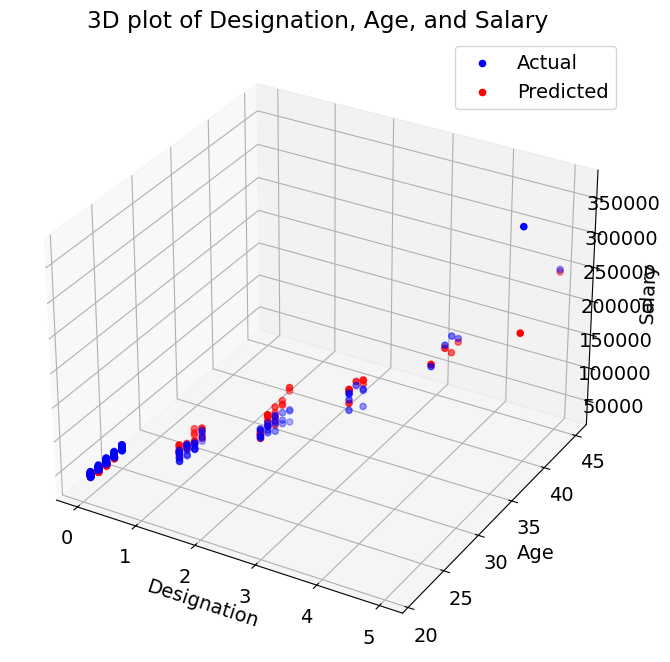

In [0]:
# Simple 3D plot for Designation, Age, and Salary  
fig = plt.figure(figsize=(12, 8))  
ax = fig.add_subplot(111, projection='3d')  
  
# Scatter plot  
ax.scatter(X_test['DESIGNATION'], X_test['AGE'], y_test, color='blue', label='Actual')  
ax.scatter(X_test['DESIGNATION'], X_test['AGE'], y_pred, color='red', label='Predicted')  
  
# Labels and title  
ax.set_xlabel('Designation')  
ax.set_ylabel('Age')  
ax.set_zlabel('Salary')  
ax.set_title('3D plot of Designation, Age, and Salary')  
  
# Legend  
ax.legend()  
  
# Show plot  
plt.show()  

### 4.2.2 Decision Tree
In this part Decision Tree will be created. \
**Different parameters were tested but the best model is shown here.**

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

Read data

In [0]:
df = pd.read_csv('df_features.csv')
df.head(5)

,DESIGNATION,AGE,PAST EXP,DAYS IN COMPANY,SALARY
0,0.0,21,0,599,44570
1,0.0,21,0,528,40955
2,0.0,22,0,1009,45550
3,0.0,22,0,857,40339
4,1.0,28,1,557,63478


Make X and y

In [0]:
# Define X and y
X = df.drop('SALARY', axis=1)
y = df['SALARY']

Make training and test sets. \
20% test

In [0]:
# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

Max_depth of 3 was the most precise after a few different attempts

In [0]:
# Train the model
model = DecisionTreeRegressor(max_depth=3, random_state=42)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [0]:
# Make predictions
y_pred = model.predict(X_test)

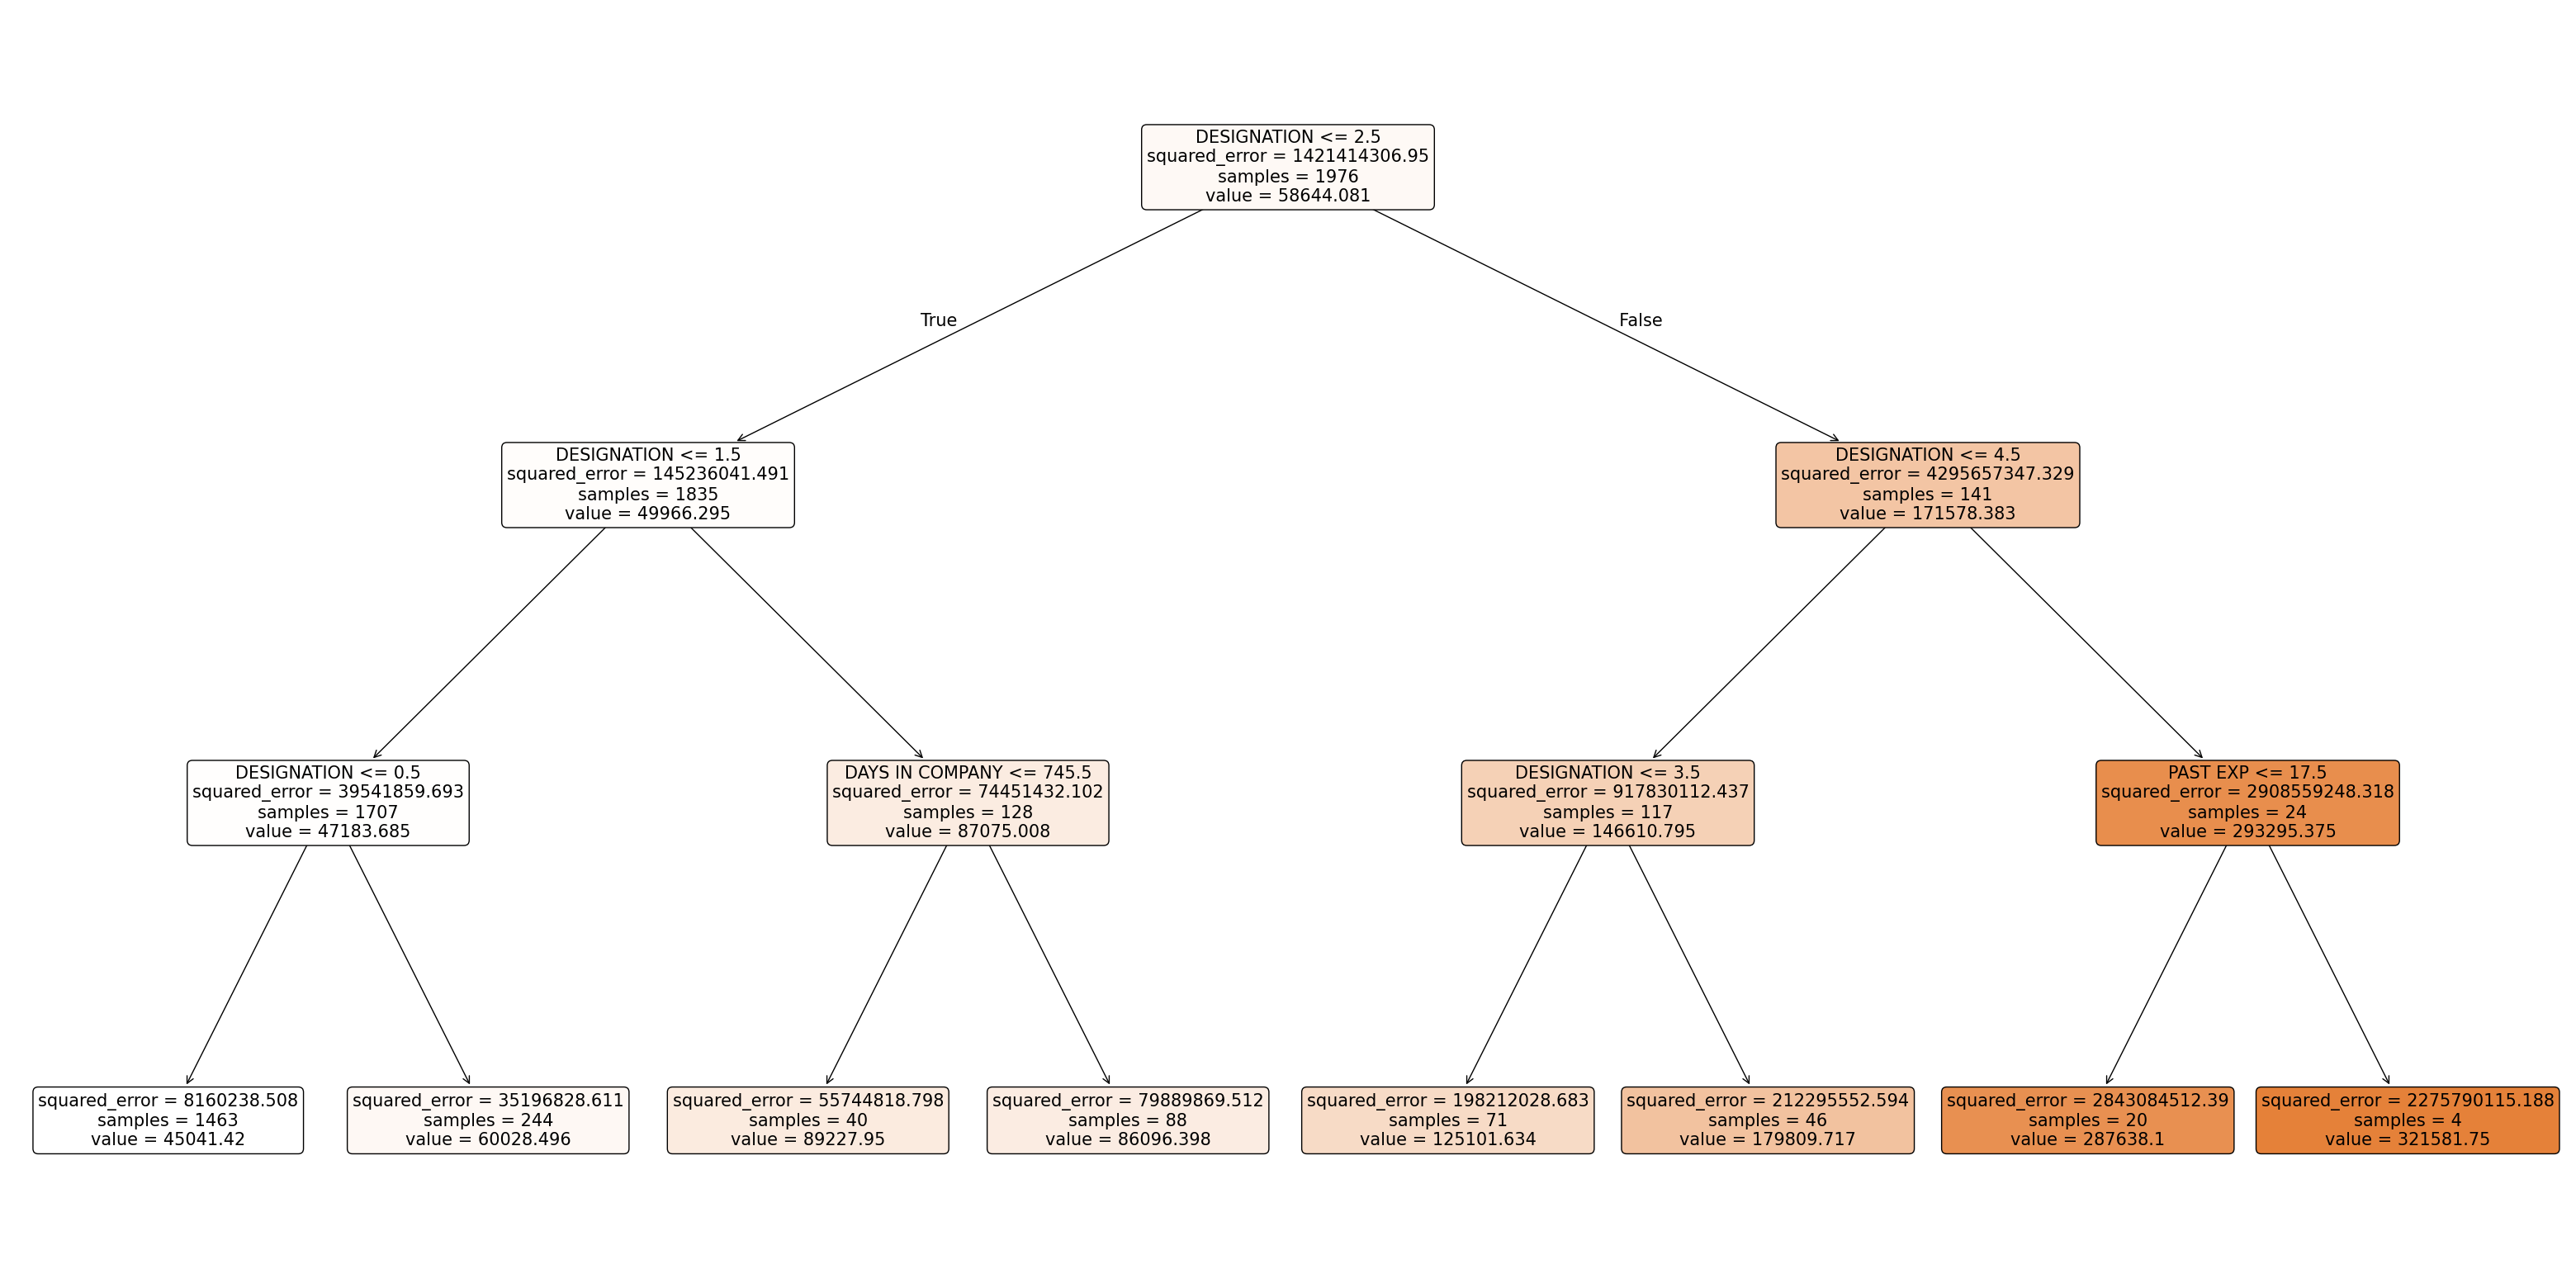

In [0]:
# Plot the tree
plt.figure(figsize=(40,20))
plot_tree(model, feature_names=X.columns, filled=True, rounded=True, fontsize=15)
plt.show()

Decision Tree only predicts 8 values and uses DESIGNATION a lot

In [0]:
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': model.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print("\nFeature Importance:")
print(feature_importance)


Feature Importance:
           feature  importance
0      DESIGNATION    0.998472
2         PAST EXP    0.001428
3  DAYS IN COMPANY    0.000100
1              AGE    0.000000


Model depends 0.998 on DESIGNATION which is quite alot compared to the other features

<Figure size 1000x600 with 0 Axes>

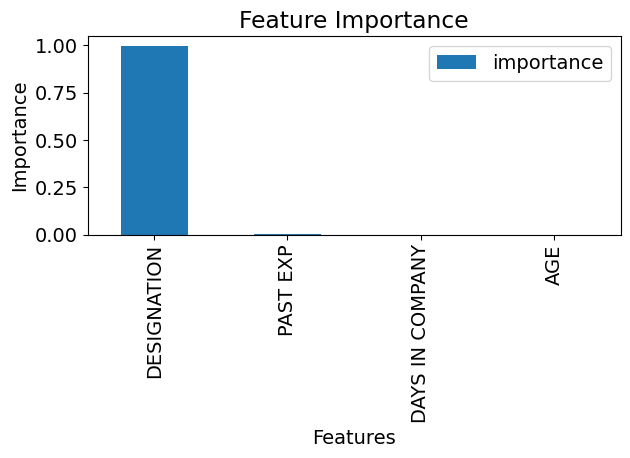

In [0]:
plt.figure(figsize=(10,6))
feature_importance.plot(x='feature', y='importance', kind='bar')
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

Model depends 0.998 on DESIGNATION which is quite alot compared to the other features

In [0]:
df_preds = pd.DataFrame({"Actual": y_test.squeeze(), "Predicted": y_pred.squeeze()})
print(df_preds)

      Actual      Predicted
22     43030   45041.420369
1880   50492   60028.495902
1719   59877   60028.495902
1177   47843   45041.420369
2343   46064   45041.420369
...      ...            ...
2245   41329   45041.420369
1825   47248   45041.420369
2181   41956   45041.420369
85     49785   45041.420369
1783  140823  125101.633803

[494 rows x 2 columns]


In [0]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

#Percentage Calc.
mean_actual = np.mean(y_test)
absolute_error_percentage = (mae / mean_actual) * 100

print(f"Mean absolute error:  {mae:.2f}")
print(f"Mean squared error:  {mse:.2f}")
print(f"Root mean squared error:  {rmse:.2f}")
print(f"mean absolute error (%): {absolute_error_percentage:.2f}%")

Mean absolute error:  3803.82
Mean squared error:  37889177.70
Root mean squared error:  6155.42
mean absolute error (%): 6.83%


Model has an error rate of 6,83%. \
Next a random forest will be tried to make it depend more on other features.

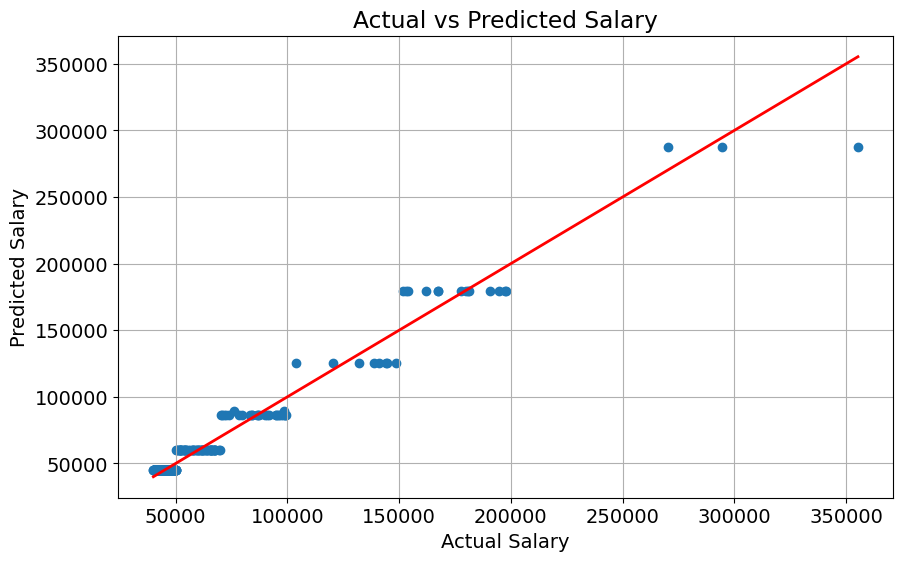

In [0]:
# Create scatter plot  
plt.figure(figsize=(10, 6))  
plt.scatter(y_test, y_pred)  
plt.xlabel('Actual Salary')  
plt.ylabel('Predicted Salary')  
plt.title('Actual vs Predicted Salary')  
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)  # Line y=x for reference  
plt.grid(True)  
plt.show()  

Its possible to see that the predictions are in one line due to only being able to make 8 predictions from the simple Decision Tree.

### 4.2.3 Random Forest
In this part a Random Forest is created

In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [0]:
df = pd.read_csv("df_features.csv")
df.head(5)

,DESIGNATION,AGE,PAST EXP,DAYS IN COMPANY,SALARY
0,0.0,21,0,599,44570
1,0.0,21,0,528,40955
2,0.0,22,0,1009,45550
3,0.0,22,0,857,40339
4,1.0,28,1,557,63478


In [0]:
rf = RandomForestRegressor(n_estimators=100, random_state = 0) # 100 Estimators

Create X and y

In [0]:
X = df.drop(['SALARY'], axis = 1)
y = df['SALARY']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [0]:
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [0]:
# Feature Importance
feature_scores = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

DESIGNATION        0.883151
AGE                0.083995
DAYS IN COMPANY    0.020679
PAST EXP           0.012175
dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

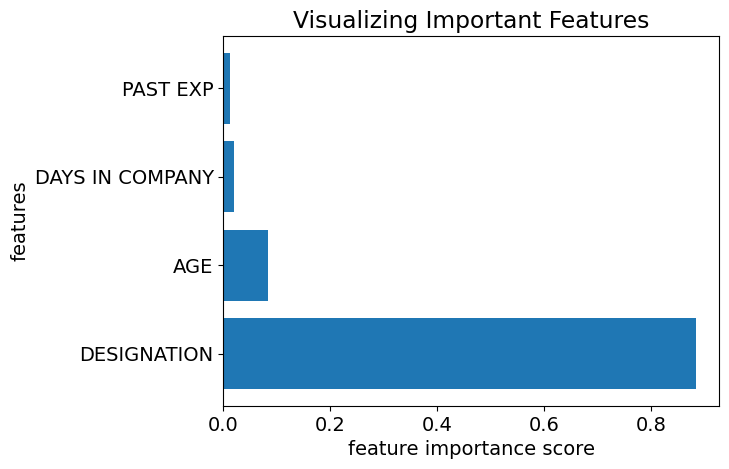

In [0]:
plt.xlabel('feature importance score')
plt.ylabel('features')
plt.title("Visualizing Important Features")
plt.barh(feature_scores.index, feature_scores)
plt.show

In [0]:
y_pred = rf.predict(X_test)

In [0]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

#Percentage Calc.
mean_actual = np.mean(y_test)
absolute_error_percentage = (mae / mean_actual) * 100

print(f"Mean absolute error:  {mae:.2f}")
print(f"Mean squared error:  {mse:.2f}")
print(f"Root mean squared error:  {rmse:.2f}")
print(f"mean absolute error (%): {absolute_error_percentage:.2f}%")

Mean absolute error:  4864.21
Mean squared error:  93907030.65
Root mean squared error:  9690.56
mean absolute error (%): 8.22%


In [0]:
df_preds = pd.DataFrame({"Actual": y_test.squeeze(), "Predicted": y_pred.squeeze()})
print(df_preds)

      Actual      Predicted
1058   48203   44914.890714
2177  128247  108156.200000
1708  213987  329527.020000
1550   46343   45554.030000
353    45123   44987.920000
...      ...            ...
2024   61390   55393.710000
952    41166   44831.020000
1861   41257   46118.160000
543    48969   47133.910000
1717   43433   46192.521667

[741 rows x 2 columns]


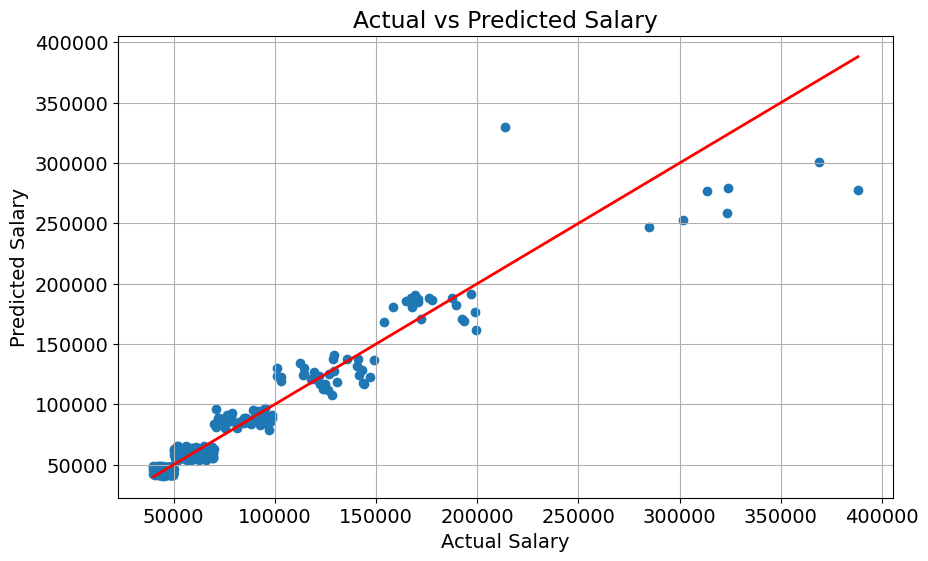

In [0]:
# Create scatter plot  
plt.figure(figsize=(10, 6))  
plt.scatter(y_test, y_pred)  
plt.xlabel('Actual Salary')  
plt.ylabel('Predicted Salary')  
plt.title('Actual vs Predicted Salary')  
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)  # Line y=x for reference  
plt.grid(True)  
plt.show()  

Predictions are more scattered compared to Decision Tree since its able to predict more values than decision tree. \
But its still less precise than Decision Tree.

# 5. Evaluation
From the 3 different models evaluation can be done.

| Performance Metrics            | Linear Regression | Decision Tree | Random Forest |
|--------------------------------|-------------------|---------------|---------------|
| Mean Absolute Error (MAE)      | 6485,96           | 3803,82       | 4864,21       |
| Mean Squared Error (MSE)       | 126552883.22      | 37889177,7    | 93907030.65   |
| Root Mean Squared Error (RMSE) | 11249.57          | 6155,42       | 9690.56       |
| Mean Absolute Error (MAPE)     | 11,38%            | 6,83%         | 8.22%         |

Decision Tree has the smallest % of errors. \
But its only able to predict 8 values and is using one feature predict (DESIGNATION)

Random Forest is 2nd with 8,22% but still relies a lot of DESIGNATION.

Its hard to change much in the data set on AGE or PAST EXP due to the size of the dataset. \
With a larger dataset oversampling or undersampling could be used or a combination. \
More featues than the what was able to use at the end would also have been nice.